### This notebook contains code needed to make the following figures from Minerva et al:
##### 1) Main figures 2-3
##### 2) Supplemental figures S2-S4, S7-S9

#### Import packages

In [1]:
suppressPackageStartupMessages(library("languageserver"))
suppressPackageStartupMessages(library("ashr"))
suppressPackageStartupMessages(library('ggbeeswarm'))
suppressPackageStartupMessages(library('ggridges'))
suppressPackageStartupMessages(library('caret'))
suppressPackageStartupMessages(library("circlize"))
suppressPackageStartupMessages(library("cowplot"))
suppressPackageStartupMessages(library("data.table"))
suppressPackageStartupMessages(library("DESeq2"))
suppressPackageStartupMessages(library("devtools"))
suppressPackageStartupMessages(library("EnhancedVolcano"))
suppressPackageStartupMessages(library("entropy"))
suppressPackageStartupMessages(library("eulerr"))
suppressPackageStartupMessages(library("ggrepel"))
suppressPackageStartupMessages(library("ggtext"))
suppressPackageStartupMessages(library("grid"))
suppressPackageStartupMessages(library("gridExtra"))
suppressPackageStartupMessages(library("gtools"))
suppressPackageStartupMessages(library("likert"))
suppressPackageStartupMessages(library("limma"))
suppressPackageStartupMessages(library("lme4")) 
suppressPackageStartupMessages(library("magrittr"))
suppressPackageStartupMessages(library("MASS"))
suppressPackageStartupMessages(library("Matrix"))
suppressPackageStartupMessages(library("metap"))          
suppressPackageStartupMessages(library("nloptr")) 
suppressPackageStartupMessages(library("patchwork"))
suppressPackageStartupMessages(library("pheatmap"))
suppressPackageStartupMessages(library("plyr"))
suppressPackageStartupMessages(library("pracma"))
suppressPackageStartupMessages(library("presto"))
suppressPackageStartupMessages(library("reldist"))
suppressPackageStartupMessages(library("RColorBrewer"))
suppressPackageStartupMessages(library("scales"))
suppressPackageStartupMessages(library("Seurat"))
suppressPackageStartupMessages(library("sctransform"))
suppressPackageStartupMessages(library("stats"))
suppressPackageStartupMessages(library("tidyverse"))
suppressPackageStartupMessages(library("VennDiagram"))
suppressPackageStartupMessages(library("viridis"))
suppressPackageStartupMessages(library("qvalue"))
suppressPackageStartupMessages(library("leiden"))
suppressPackageStartupMessages(library("sda"))
suppressPackageStartupMessages(library("pROC"))

Warning message:
“package ‘ggplot2’ was built under R version 4.4.3”
Warning message:
“package ‘lattice’ was built under R version 4.4.3”
Warning message:
“package ‘data.table’ was built under R version 4.4.3”
Warning message:
“package ‘DESeq2’ was built under R version 4.4.3”
Warning message:
“package ‘lme4’ was built under R version 4.4.3”
Warning message:
“package ‘Matrix’ was built under R version 4.4.3”
Warning message:
“package ‘nloptr’ was built under R version 4.4.3”
Warning message:
“package ‘scales’ was built under R version 4.4.3”
Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Warning message:
“package ‘sctransform’ was built under R version 4.4.3”


#### Load the preprocessed and integrated data

In [2]:
SR_pal <- c('#0064B7','#FFA833')
RS_pal <- c('resilient'='#FFA833',
            'susceptible'='#0064B7')
neuron_pal <- c('DA'='#834977',
                'Mixed'='#A09AC1',
                'Glut'='#547294',
                'GABA-1'='#9fb88c',
                'GABA-2'='#8fc9ad',
                'GABA-3'='#D6E0AB',
                'GABA-4'='#71a8a2',
                'GABA-5'='#96c487', 
                'GABA-6'='#7aa385') 
da_pal <- c("#fbb9eb","#b8a6b3","#a03564","#4b0036","#834977","#6c5b7b")

cluster.names <- c("neuron1","neuron2","neuron3","astro","micro","endo","OPCs","premyelinating_oligo","myelinating_oligo")
subcluster.names <- c("DA","Mixed","GABA-1","GABA-2","GABA-3","GABA-4","GABA-5","GABA-6","Glut")

In [4]:
all_samples <- readRDS(file='./analysis_outputs/seurat_objects/integrated_samples_2000features_40neighbors_9pcs_0.1res.RDS')
DefaultAssay(all_samples) <- "RNA"

### FIGURE 2

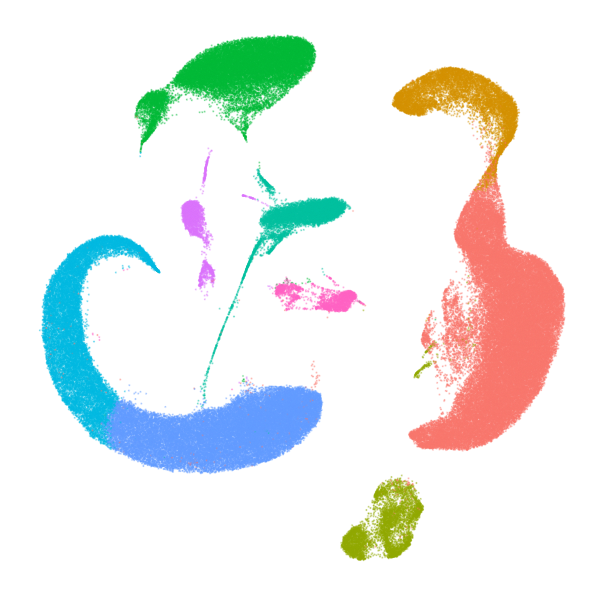

In [6]:
# Figure 2A

levels(Idents(all_samples)) <- c('neuron1','neuron2','neuron3','astro','OPCs','premyelinating_oligo','myelinating_oligo','micro','endo')

umap_df <- Embeddings(all_samples, "umap") %>%
  as.data.frame() %>%
  cbind(all_samples@meta.data)

options(repr.plot.width=5, repr.plot.height=5)
ggplot(umap_df, aes(x = -UMAP_1, y = UMAP_2, color = cluster.names)) +
  geom_point(size = 0.005, alpha = 0.3) + 
  theme_classic() + NoLegend() + NoAxes() 

ggsave("./plots/final_figures/all_nuclei_umap.pdf", width=5, height=5,dpi=320)

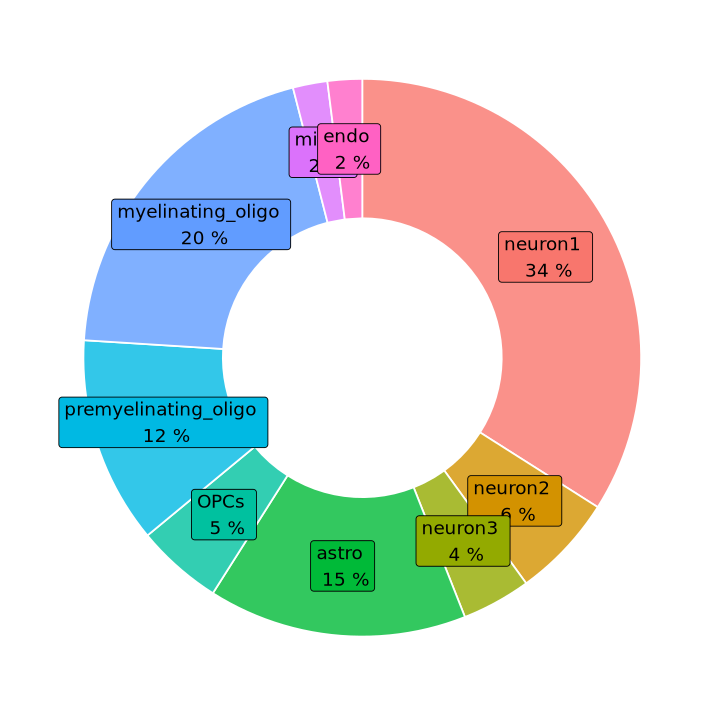

In [171]:
# Figure 2B
Idents(all_samples) <- "cluster.names"
cluster_cell_counts <- data.frame(table(Idents(all_samples)))
colnames(cluster_cell_counts) <- c('cluster','count')
cluster_cell_counts$prop <- round(cluster_cell_counts$count / sum(cluster_cell_counts$count), 2)
cluster_cell_counts$ymax <- round(cumsum(cluster_cell_counts$prop), 2)
cluster_cell_counts$ymin = c(0, head(cluster_cell_counts$ymax, n=-1))

write.csv(cluster_cell_counts, file="./analysis_outputs/all_nuclei_cluster_cell_counts.csv")

options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(cluster_cell_counts, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=cluster)) +
     geom_rect(alpha=0.8, color="white") + theme_classic() + NoLegend() + NoAxes() +
     geom_label(aes(label = paste(cluster, "\n", prop * 100, "%"), 
                    x = 3.5, y = (ymin + ymax) / 2),
                inherit.aes = TRUE, show.legend = FALSE) +
     theme(axis.text.y = element_blank(),
           axis.text.x = element_blank(),
           axis.title.y = element_blank(),
           axis.ticks.x = element_blank()) + 
     coord_polar(theta="y") + xlim(c(2, 4))
ggsave('./plots/final_figures/all_nuclei_cluster_cell_counts.pdf', width=6, height=6,dpi=320)

### FIGURE S2

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


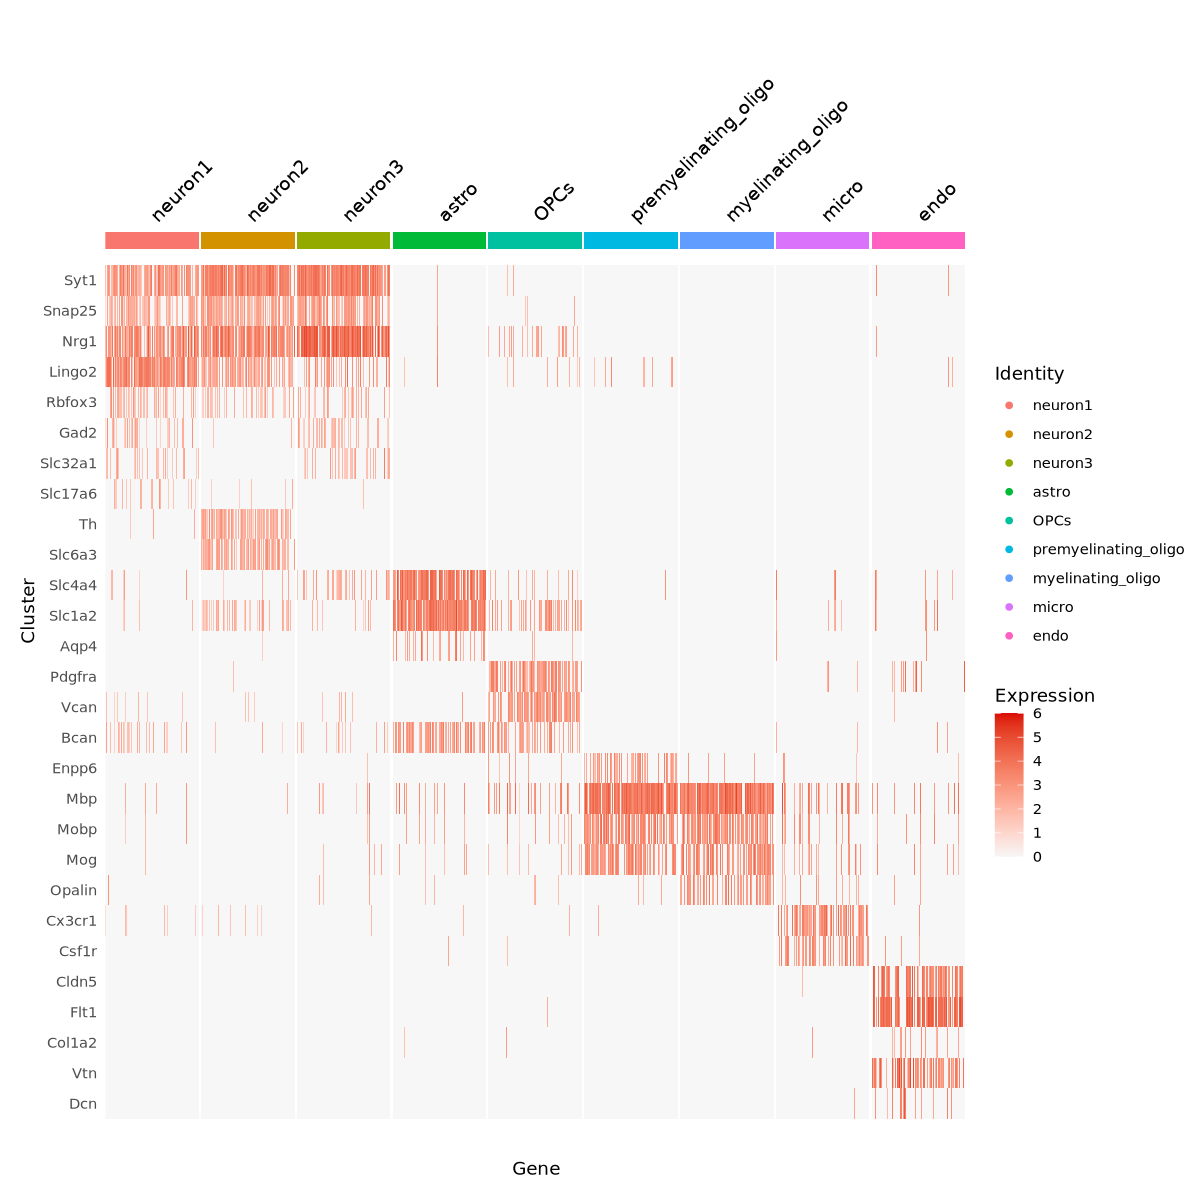

In [16]:
# Figure S2A
marker_features <- c("Syt1","Snap25","Nrg1","Lingo2","Rbfox3","Gad2","Slc32a1","Slc17a6","Th","Slc6a3",
                     "Slc4a4","Slc1a2","Aqp4","Pdgfra","Vcan","Bcan","Enpp6","Mbp","Mobp","Mog","Opalin",
                     "Cx3cr1","Csf1r","Cldn5","Flt1","Col1a2","Vtn","Dcn")

options(repr.plot.width = 10, repr.plot.height = 10) 
DoHeatmap(subset(all_samples, downsample=500), slot="data", features = marker_features, size=4) + 
    labs(y="Cluster", x="Gene") + 
    theme(plot.background=element_rect(fill="white", color="white"),
          plot.margin=unit(c(0.5,0.1,0.1,0.1), "inches")) + 
    scale_fill_gradient2(low="white", mid="#f7f7f7", high="#db0707", guide="colourbar", na.value="white")
ggsave("./plots/final_figures/all_nuclei_marker_gene_heatmap.pdf", width=10, height=6.5, dpi=320)

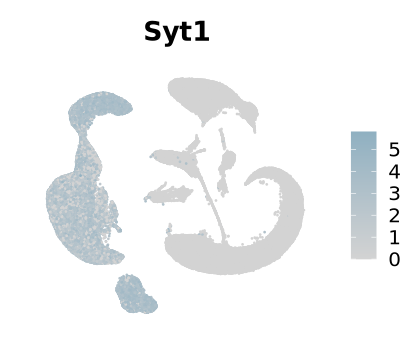

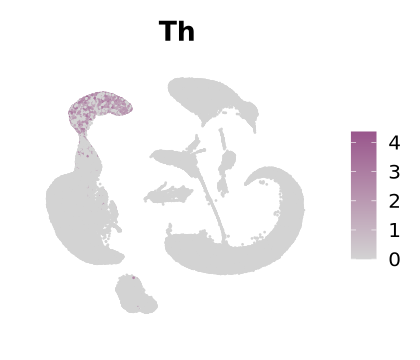

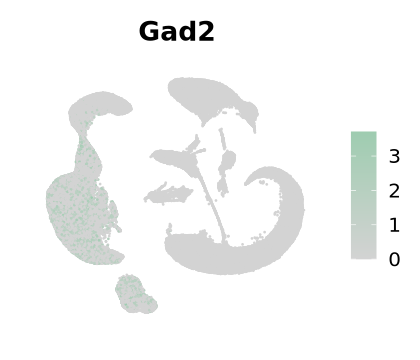

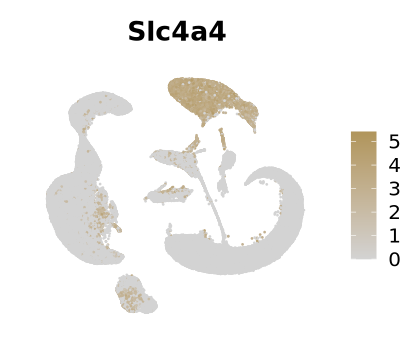

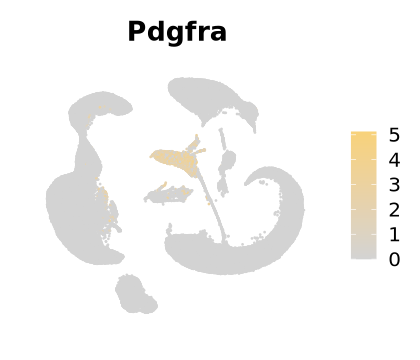

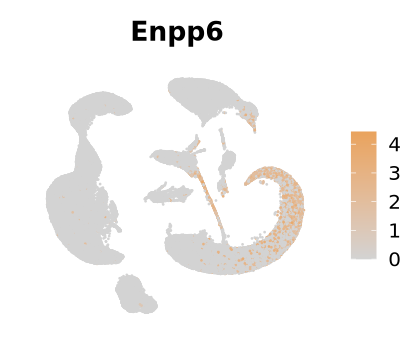

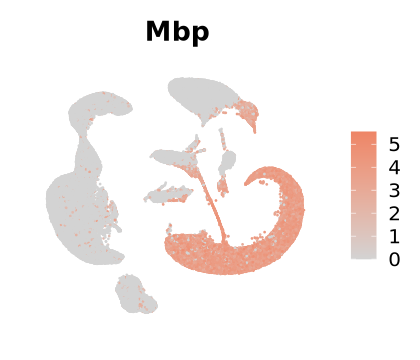

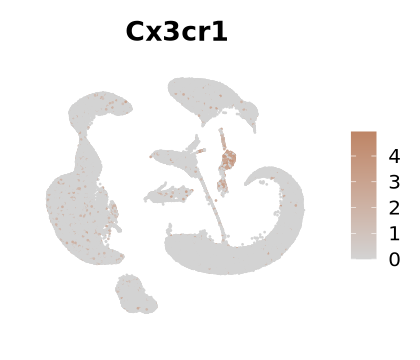

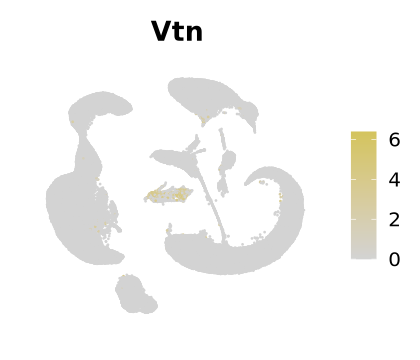

In [90]:
# Figures S2B-I
cluster_pal <- c('#8FB0C1', #neuron1: light purple
                '#99568C', # neuron2: purple
                '#9ECCB0', # neuron3: tuquoise
                '#B0955B', # astro
                '#F8D27A', # OPCs
                '#E9A35D', # premyelinating_oligo
                '#Ee8566', # myelinating_oligo
                '#BE8566', # micro
                '#D4C45D') # endo 
marker_genes <- c("Syt1" ,"Th", "Gad2", "Slc4a4", "Pdgfra", "Enpp6", "Mbp", "Cx3cr1", "Vtn")

for (i in 1:length(marker_genes)) {
    options(repr.plot.width = 3.5, repr.plot.height = 3)
    p <- FeaturePlot(all_samples, features=marker_genes[i], cols=c("lightgrey",cluster_pal[i]), 
                reduction="umap", label=FALSE, repel=TRUE, raster=FALSE) +
        NoAxes() + labs(title=marker_genes[i]) +
        theme(plot.background=element_rect(fill="white", color="white"))
    plot(p)
    ggsave(paste0("./plots/final_figures/all_nuclei_",marker_genes[i],"_featureplot_new.pdf"), width=3.5, height=3,dpi=320)
}

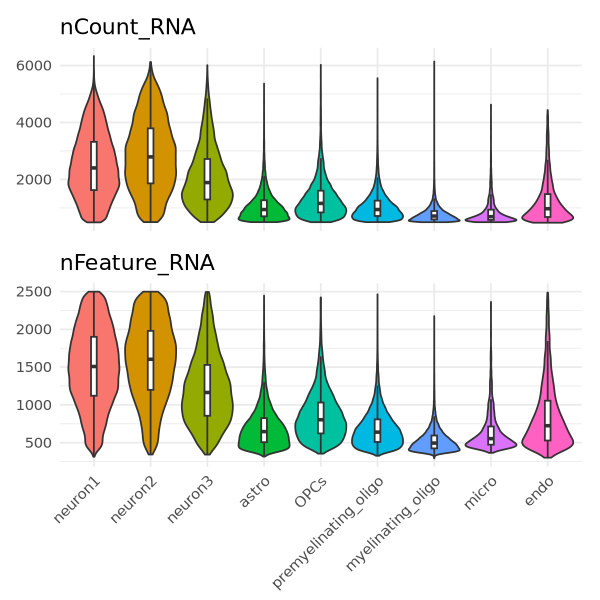

In [39]:
# Figure S2J
options(repr.plot.width = 5, repr.plot.height = 5)  

# Plot for nCount_RNA
p1 <- VlnPlot(all_samples, features = "nCount_RNA", pt.size = 0) +
  geom_boxplot(width = 0.1, fill = "white", outlier.shape = NA) +
  theme_minimal() + 
  theme(legend.position = "none",
    axis.title.x = element_blank(),  
    axis.text.x = element_blank(),  
    axis.ticks.x = element_blank()) 

# Plot for nFeature_RNA
p2 <- VlnPlot(all_samples, features = "nFeature_RNA", pt.size = 0) +
  geom_boxplot(width = 0.1, fill = "white", outlier.shape = NA) +
  theme_minimal() +
theme(legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1), 
    axis.title.x = element_blank()) 

p1 / p2

ggsave("./plots/final_figures/all_nuclei_UMI_and_gene_count_violins.pdf", width=5, height=5, dpi=320)    

In [12]:
# Read in the DESeq2 results (calculated using separate deseq_wald.R script)
all_cells_deseq <- read.csv("./analysis_outputs/DEGs/deseq/all_cells_deseq_results.csv")

# Read in dataframe with DEG counts across clusters (calculated using separate deseq_wald.R script)
all_cells_deg_counts <- read.csv('./analysis_outputs/DEGs/deseq/all_cells_deg_counts.csv')

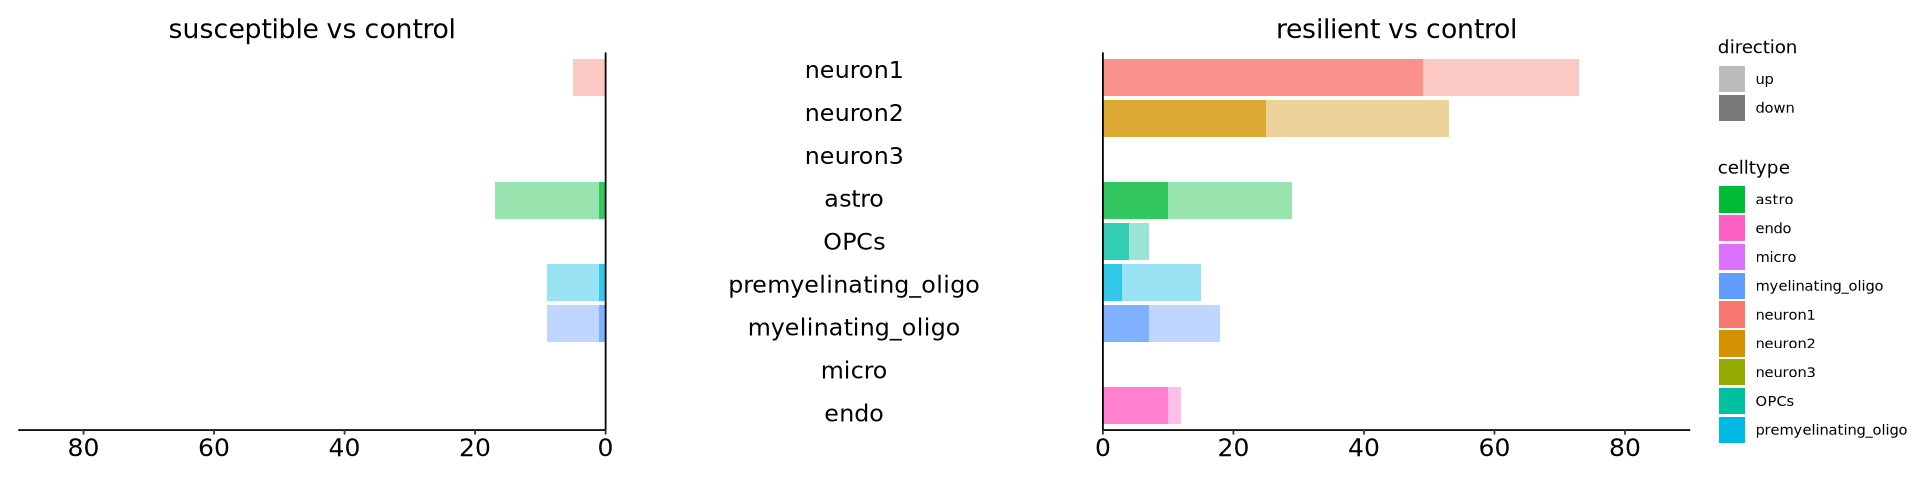

In [339]:
# Figure 2C

cluster_pal <- scales::hue_pal()(9)
celltype_order <- c('neuron1', 'neuron2', 'neuron3', 'astro', 'OPCs', 
                    'premyelinating_oligo', 'myelinating_oligo', 'micro', 'endo')
names(cluster_pal) <- celltype_order
# Explicitly setting the order of the "direction" factor
all_cells_deg_counts$direction <- factor(all_cells_deg_counts$direction, levels = c("up", "down", "both"))

options(repr.plot.width = 16, repr.plot.height = 4)

# Plot 1: Susceptible vs Control
p_susceptible <- all_cells_deg_counts %>%
  filter(comparison == "susceptible vs control",
         direction != "both") %>%
  ggplot(aes(x = factor(celltype, levels = celltype_order), 
             y = count, 
             weight = count, 
             fill = celltype, 
             alpha = direction)) + 
  geom_bar(stat = "identity", position = "stack") + 
  theme_classic() + 
  labs(title = "susceptible vs control", y = NULL) +
  scale_y_reverse(limits = c(90, 0), breaks = c(80, 60, 40, 20, 0), expand=c(0,0)) + 
  coord_flip() +
  theme(
    legend.position = "none",
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(),  
    axis.ticks.y = element_blank(), 
    axis.title.x = element_text(size = 15, vjust = -0.25), 
    axis.text.x = element_text(size = 15, color = "black"),
    plot.title = element_text(hjust = 0.5, size = 16)
  ) +
  scale_x_discrete(position = "top", limits = rev(celltype_order)) +
  scale_fill_manual(values = cluster_pal) +
  scale_alpha_manual(values = c("up" = 0.4, "down" = 0.8))

# Plot 2: Resilient vs Control
p_resilient <- all_cells_deg_counts %>%
  filter(comparison == "resilient vs control",
         direction != "both") %>%
  ggplot(aes(x = factor(celltype, levels = celltype_order), 
             y = count, 
             weight = count, 
             fill = celltype, 
             alpha = direction)) + 
  geom_bar(stat = "identity", position = "stack") + 
  theme_classic() + 
  coord_flip() +
  labs(title = "resilient vs control", y = NULL) +
  scale_y_continuous(limits = c(0, 90), breaks = c(0, 20, 40, 60, 80), expand=c(0,0)) + 
  scale_x_discrete(limits = rev(celltype_order)) +
  theme(
    #legend.position = "none",
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(),  
    axis.ticks.y = element_blank(), 
    axis.title.x = element_text(size = 15, vjust = -0.25), 
    axis.text.x = element_text(size = 15, color = "black"),
    plot.title = element_text(hjust = 0.5, size = 16)
  ) +
  scale_fill_manual(values = cluster_pal) +
  scale_alpha_manual(values = c("up" = 0.4, "down" = 0.8))

# Create the shared celltype labels
celltype_labels <- ggplot(data.frame(celltype = factor(celltype_order, levels = rev(celltype_order)), 
                                     y = 1:9),
                          aes(x = 1, y = y, label = celltype)) +
  geom_text(aes(label = celltype), size = 5, hjust = 0.5) +  
  scale_y_reverse() +
  xlim(0.5, 1.5) + 
  theme_void() +
  theme(
    plot.margin = margin(t = 5, r = 0, b = 5, l = 0)  
  )

p_susceptible + celltype_labels + p_resilient +
  plot_layout(widths = c(1, 0.8, 1))  

ggsave("./plots/final_figures/all_nuclei_deg_counts.pdf", width=12, height=4, dpi=320)

Warning message in wilcox.test.default(filter(all_cells_deg_counts, comparison == :
“cannot compute exact p-value with ties”


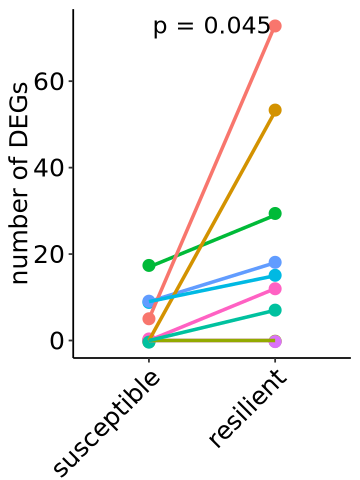

In [537]:
# Figure 2D

all_cells_deg_counts$comparison <- factor(all_cells_deg_counts$comparison, levels = c("susceptible vs control", "resilient vs control"))
pval <- wilcox.test(filter(all_cells_deg_counts, comparison=="susceptible vs control" & direction=="both")$count,
            filter(all_cells_deg_counts, comparison=="resilient vs control" & direction=="both")$count)$p.value

options(repr.plot.width = 3, repr.plot.height = 4)
ggplot(
  filter(all_cells_deg_counts, 
         celltype %in% c('neuron1', 'neuron2', 'neuron3', 'astro', 'OPCs', 
                         'premyelinating_oligo', 'myelinating_oligo', 'micro', 'endo') & 
         comparison != "susceptible vs resilient" & 
         direction == "both"), 
  aes(x = comparison, y = count, color = celltype, group = celltype)  # Group by celltype
) + 
  geom_jitter(width = 0, size = 3) +  # Increase the size of the dots here
  geom_line(size = 1) +  # Add lines connecting the same celltype
  theme_classic() + 
  NoLegend() +
  labs(y = "number of DEGs") + 
  scale_x_discrete(labels = c("susceptible", "resilient")) + 
  scale_color_manual(values = cluster_pal) +
  theme(
    legend.text = element_text(size = 15), 
    legend.title = element_text(size = 15),
    axis.title.x = element_blank(), 
    axis.text.x = element_text(size = 15, color = "black", angle = 45, hjust = 1),
    axis.title.y = element_text(size = 15, color = "black"), 
    axis.text.y = element_text(size = 15, color = "black"), 
    plot.title = element_text(hjust = 0.5, size = 16)) +
    annotate("text", x = 1.5, y = max(all_cells_deg_counts$count),
      label = paste("p =", format(pval, digits = 2)), size = 5, hjust = 0.5, color = "black")
ggsave("./plots/final_figures/all_nuclei_deg_count_summary_no_jitter.pdf", width=3, height=4, dpi=320)

In [538]:
wilcox.test(filter(all_cells_deg_counts, comparison=="susceptible vs control" & direction=="both")$count,
            filter(all_cells_deg_counts, comparison=="resilient vs control" & direction=="both")$count)

Warning message in wilcox.test.default(filter(all_cells_deg_counts, comparison == :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  filter(all_cells_deg_counts, comparison == "susceptible vs control" & direction == "both")$count and filter(all_cells_deg_counts, comparison == "resilient vs control" & direction == "both")$count
W = 18, p-value = 0.04524
alternative hypothesis: true location shift is not equal to 0


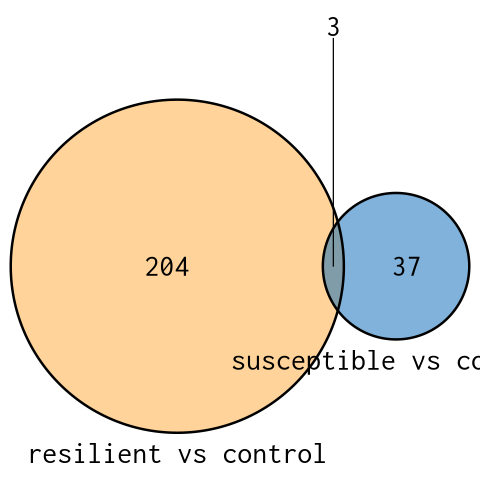

In [348]:
# Figure 2E
all_cells_deseq$celltype_gene <- paste(all_cells_deseq$celltype, all_cells_deseq$gene, sep="_")

Rgenes <- unique(all_cells_deseq[!is.na(all_cells_deseq$gene) & !is.na(all_cells_deseq$padj) & all_cells_deseq$comparison=="resilient vs control" & all_cells_deseq$padj<0.1,]$celltype_gene)
Sgenes <- unique(all_cells_deseq[!is.na(all_cells_deseq$gene) & !is.na(all_cells_deseq$padj) & all_cells_deseq$comparison=="susceptible vs control" & all_cells_deseq$padj<0.1,]$celltype_gene)

options(repr.plot.width = 4, repr.plot.height = 4)
v <- venn.diagram(x = list(Sgenes, Rgenes), 
                  category.names = c("susceptible vs control", "resilient vs control"), 
                  lwd = 2, cex = 1.5, cat.cex = 1.5,
                  cat.pos = c(0, 0),  
                  fill = SR_pal,  
                  filename = NULL)

grid.draw(v)
ggsave(v, file="./plots/final_figures/all_nuclei_SR_vs_control_venn.pdf", width=5, height=5, dpi=320)

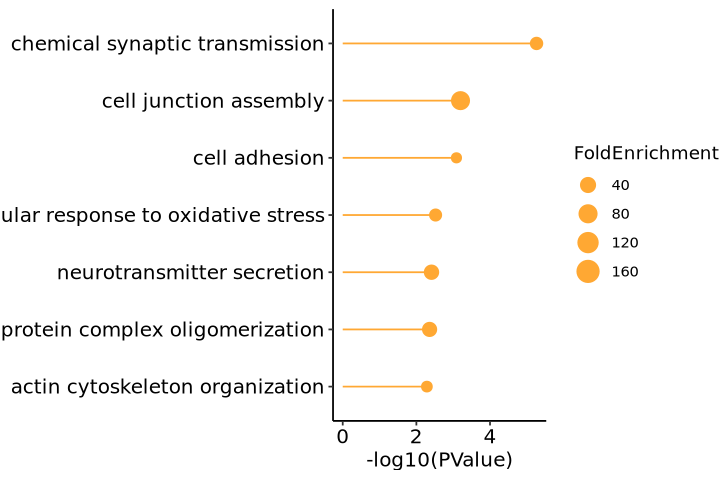

In [167]:
# Figure 2F

go_down <- data.table::fread(file="/jukebox/pena/Addie/defeat-snseq-paper/david_res_all_cells_GOTERM_BP_DIRECT_down.txt", sep="\t")
go_up <- data.table::fread(file="/jukebox/pena/Addie/defeat-snseq-paper/david_res_all_cells_GOTERM_BP_DIRECT_up.txt", sep="\t")

# Rename the column "Fold Enrichment" to "FoldEnrichment"
colnames(go_down)[colnames(go_down) == "Fold Enrichment"] <- "FoldEnrichment"
colnames(go_up)[colnames(go_up) == "Fold Enrichment"] <- "FoldEnrichment"

# Remove all before and up to "~":
go_down$Term <- gsub(".*~","",go_down$Term)
go_up$Term <- gsub(".*~","",go_up$Term)

min_size <- min(c(go_down$FoldEnrichment, go_up$FoldEnrichment), na.rm = TRUE)
max_size <- max(c(go_down$FoldEnrichment, go_up$FoldEnrichment), na.rm = TRUE)

# Upregulated plot
options(repr.plot.width = 6, repr.plot.height = 4) 
go_up[order(log10(go_up$PValue)),][1:7] %>%
  ggplot(aes(x = fct_reorder(Term, -log10(PValue)), y = -log10(PValue))) +
    geom_segment(aes(x = fct_reorder(Term, -log10(PValue)), 
                     xend = fct_reorder(Term, -log10(PValue)), 
                     y = 0, yend = -log10(PValue)), color = SR_pal[2]) +
    geom_point(aes(size = FoldEnrichment), color = SR_pal[2]) +
    coord_flip() +
    scale_size_continuous(range = c(2, 6), limits = c(min_size, max_size)) +  
    theme_classic() +
    theme(axis.text.x = element_text(color = "black", size = 12),
          axis.text.y = element_text(color = "black", size = 12),
          axis.title.x = element_text(color = "black", size = 12),
          axis.title.y = element_blank())

ggsave(file="./plots/final_figures/all_cells_resilient_GO.pdf", width=6, height=4, dpi=320)


### Figure S3

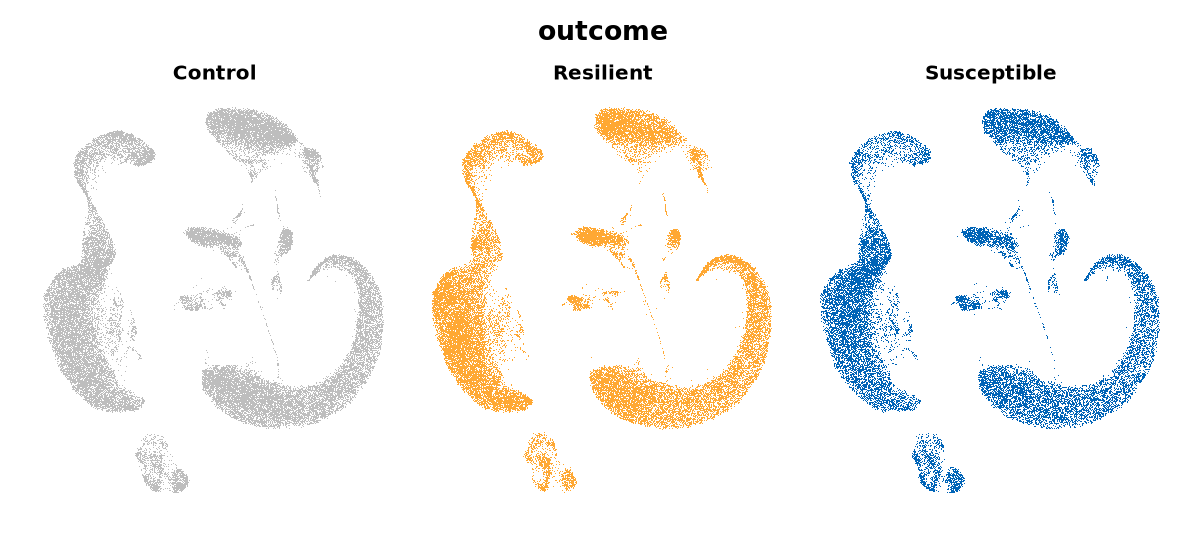

In [47]:
# Figure S3A
options(repr.plot.width = 10, repr.plot.height = 4.5)  
DimPlot(all_samples, reduction="umap", label=FALSE, repel=TRUE, raster=TRUE, 
        split.by="outcome", group.by="outcome") +
        NoAxes() + NoLegend() + 
        scale_color_manual(values=c("Control"="gray","Resilient"="#FFA833","Susceptible"="#0064B7"))
ggsave("./plots/final_figures/all_nuclei_UMAP_split_by_outcome.pdf", width=10, height=4.5, dpi=320)    

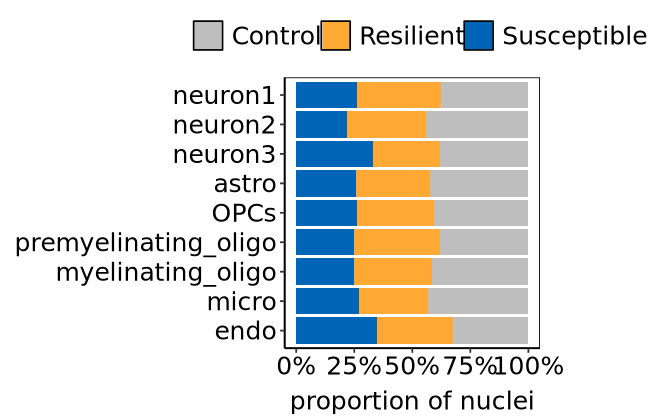

In [313]:
# Figure S3B
cluster_outcome_counts <- data.frame(table(all_samples@meta.data$outcome, 
                                           all_samples@meta.data$cluster.names))
colnames(cluster_outcome_counts) <- c("outcome","cluster","count")

options(repr.plot.width = 5.5, repr.plot.height = 3.5) 
ggplot(cluster_outcome_counts, aes(fill=outcome, y=count, x=cluster)) + 
    ylab("proportion of nuclei") +
    geom_bar(position="fill", stat="identity") + coord_flip() + theme_classic() + 
    theme(plot.margin=unit(c(0.1,1,0.1,0.4), "inches"), 
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
          panel.background=element_rect(colour="black"),
          legend.text = element_text(size=15), 
          legend.position = "top", legend.title = element_blank(),
          axis.title.x = element_text(size=15, vjust=-0.25), 
          axis.text.x = element_text(size=15, color="black"),
          axis.title.y = element_blank(), axis.text.y = element_text(size=15, color="black")) + 
    scale_x_discrete(limits=rev(c("neuron1","neuron2","neuron3","astro",
                                  "OPCs","premyelinating_oligo","myelinating_oligo",
                                  "micro","endo"))) +
    scale_y_continuous(labels=percent) + scale_fill_manual(values=c("gray",'#FFA833',"#0064B7"))
ggsave("./plots/final_figures/all_nuclei_percent_of_cluster_by_outcome.pdf", width=5.5, height=3.5, dpi=320)    

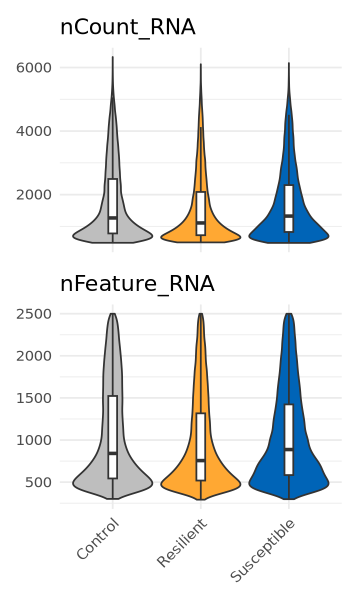

In [51]:
# Figure S3C
options(repr.plot.width = 3, repr.plot.height = 5)  

# Plot for nCount_RNA (split by outcome)
p1 <- VlnPlot(all_samples, features = "nCount_RNA", pt.size = 0, group.by = "outcome",
  cols = c('gray',"#FFA833","#0064B7")) +
  geom_boxplot(width = 0.1, fill = "white", outlier.shape = NA) +
  theme_minimal() + 
  theme(legend.position = "none",
        axis.title.x = element_blank(),  
        axis.text.x = element_blank(),  
        axis.ticks.x = element_blank()) 

# Plot for nFeature_RNA (split by outcome)
p2 <- VlnPlot(all_samples, features = "nFeature_RNA", pt.size = 0, group.by = "outcome",
  cols = c('gray',"#FFA833","#0064B7")) +
  geom_boxplot(width = 0.1, fill = "white", outlier.shape = NA) +
  theme_minimal() +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 45, hjust = 1), 
        axis.title.x = element_blank()) 

p1 / p2

ggsave("./plots/final_figures/all_nuclei_UMI_and_gene_count_violins_by_outcome.pdf", width=5, height=5, dpi=320)


### Figure S4

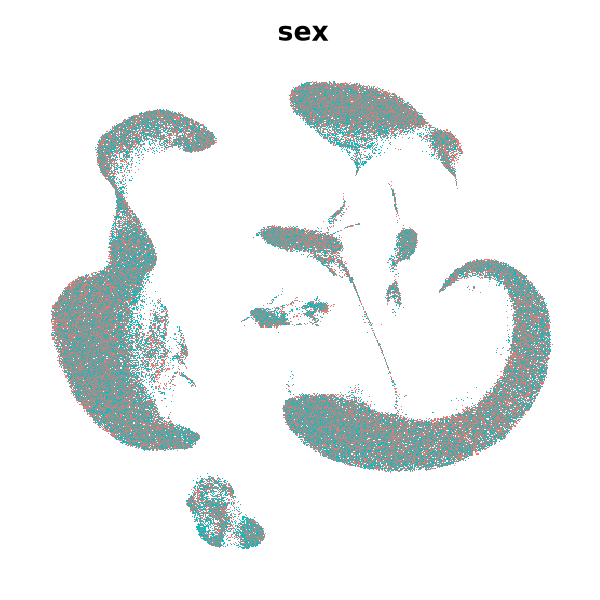

In [9]:
# Figure S4A
options(repr.plot.width = 5, repr.plot.height = 5)  
DimPlot(all_samples, reduction="umap", label=FALSE, repel=TRUE, raster=TRUE, group.by="sex") +
        NoAxes() + NoLegend() 
#ggsave("./plots/final_figures/all_nuclei_UMAP_split_by_sex.pdf", width=5, height=5, dpi=320)    

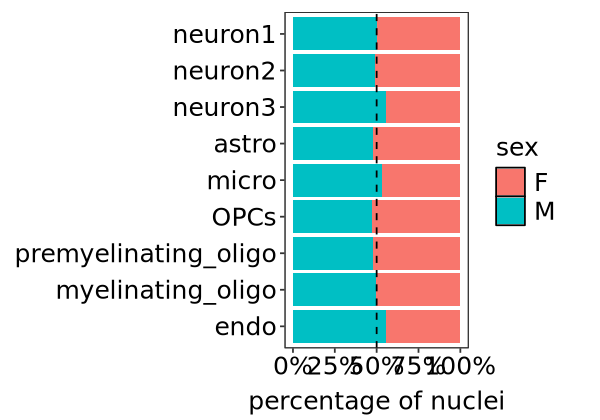

In [314]:
# Figure S4B
sex_nuclei_counts <- data.frame(table(all_samples@meta.data$cluster.names, all_samples@meta.data$sex))
colnames(sex_nuclei_counts) <- c("cluster", "sex", "count")

options(repr.plot.width = 5, repr.plot.height = 3.5) 
ggplot(sex_nuclei_counts, aes(fill=sex, y=count, x=cluster)) + ylab("percentage of nuclei") +
    geom_bar(position="fill", stat="identity") + coord_flip() + 
    theme_bw() + geom_hline(yintercept=0.5, linetype="dashed") +
    theme(plot.margin=unit(c(0.1,0.3,0.1,0.4), "inches"), 
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
          panel.background=element_rect(colour="black"),
          legend.text = element_text(size=15), legend.title = element_text(size=15),
          axis.title.x = element_text(size=15, vjust=-0.25), 
          axis.text.x = element_text(size=15, color="black"),
          axis.title.y = element_blank(), axis.text.y = element_text(size=15, color="black")) + 
    scale_x_discrete(limits=rev(c("neuron1","neuron2","neuron3","astro","micro",
                                  "OPCs","premyelinating_oligo","myelinating_oligo","endo"))) +
    scale_y_continuous(labels=percent) 
ggsave("./plots/updated/all_nuclei_percent_of_cluster_by_sex.pdf", width=5, height=3.5, dpi=320)    

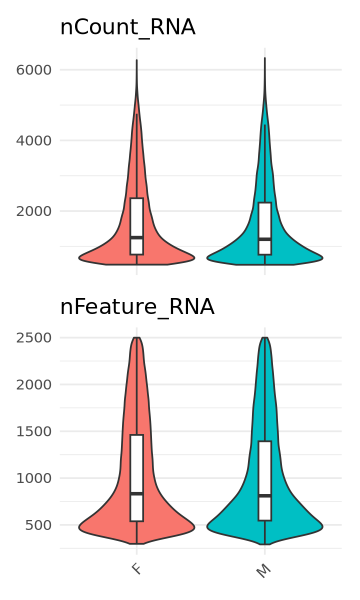

In [148]:
# Figure S4C
options(repr.plot.width = 3, repr.plot.height = 5)  

# Plot for nCount_RNA (split by outcsexome)
p1 <- VlnPlot(all_samples, features = "nCount_RNA", pt.size = 0, group.by = "sex") +
  geom_boxplot(width = 0.1, fill = "white", outlier.shape = NA) +
  theme_minimal() + 
  theme(legend.position = "none",
        axis.title.x = element_blank(),  
        axis.text.x = element_blank(),  
        axis.ticks.x = element_blank()) 

# Plot for nFeature_RNA (split by sex)
p2 <- VlnPlot(all_samples, features = "nFeature_RNA", pt.size = 0, group.by = "sex") +
  geom_boxplot(width = 0.1, fill = "white", outlier.shape = NA) +
  theme_minimal() +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 45, hjust = 1), 
        axis.title.x = element_blank()) 

p1 / p2

ggsave("./plots/final_figures/all_nuclei_UMI_and_gene_count_violins_by_sex.pdf", width=5, height=5, dpi=320)


In [ ]:
############## FIGURE S4D-G 

### Figure S7

In [82]:
# Function for creating volcano plots
plot_volcano <- function(data, group, cluster, xmin=-6, xmax=6, ymin=0, ymax=10, padj_cutoff=0.1, lfc_cap=6) {
  
  if (group == "susceptible") {
    comp <- "susceptible vs control"
    color <- RS_pal[['susceptible']]
  } else if (group == "resilient") {
    comp <- "resilient vs control"
    color <- RS_pal[['resilient']]
  } 
  
  # Filter data based on the given cluster and comparison
  filtered_data <- subset(data, comparison == comp & data$celltype == cluster & !is.na(padj))
  
  # Cap log2FoldChange at +/- 6
  filtered_data$log2FoldChange <- pmin(filtered_data$log2FoldChange, lfc_cap)
  filtered_data$log2FoldChange <- pmax(filtered_data$log2FoldChange, -lfc_cap)

  # Cap pvalue at 1e-10
  filtered_data$pvalue <- pmax(filtered_data$pvalue, 1e-10)
  
  # Create volcano plot --------------------------------------------------------------------------------------------------------------
  options(repr.plot.width = 4, repr.plot.height = 3.5)
  plot <- ggplot(filtered_data, aes(x = log2FoldChange, y = -log10(pvalue), label = gene, color = padj < padj_cutoff)) + 
    geom_point(aes(size = padj < padj_cutoff)) + 
    scale_color_manual(values = c("gray", color)) + 
    scale_size_manual(values = c(1, 2)) +  
    theme_classic() +     
    theme(
      axis.text.x = element_text(size = 12, color = "black"),
      axis.title.x = element_text(size = 12, color = "black"),
      axis.text.y = element_text(size = 12, color = "black"),
      axis.title.y = element_text(size = 12, color = "black"),
      legend.position = "none") + xlim(xmin,xmax) + ylim(ymin,ymax) + 
    labs(y = "-log10(p-value)", x = "log2FoldChange", title = paste(cluster, group)) 
  
  return(plot)
}


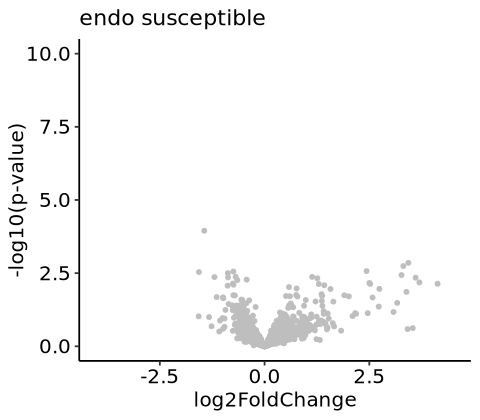

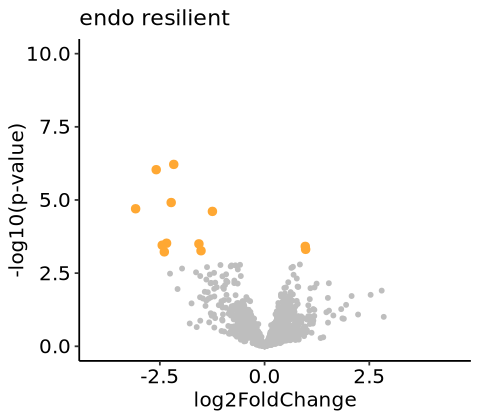

In [84]:
# Figure S7A-F
for (clust in cluster.names) {
    for (g in c('susceptible', 'resilient')) {
    
        v <- plot_volcano(data=all_cells_deseq, group=g, cluster=clust, xmin=-4, xmax=4.5, ymin=0, ymax=10)
        plot(v)
        ggsave(file=paste0("./plots/final_figures/",g,"_vs_control_volcano_",clust,".pdf"), width=4, height=3.5, dpi=320)
    }
}

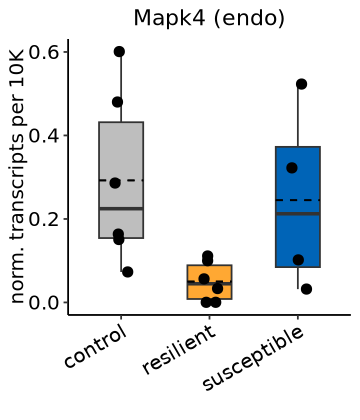

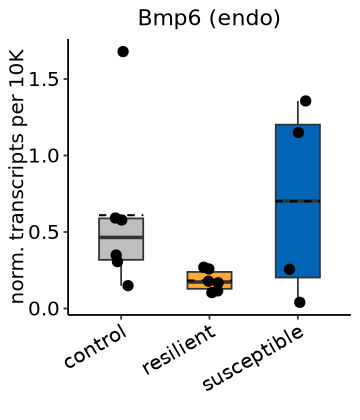

In [205]:
# Figure S7G-J

de_genes <- c("Mapk4","Bmp6")

clust <- 'endo'
sub_obj <- subset(all_samples, subset=cluster.names==clust)
for (gene in de_genes) {
    expr_df <- data.frame(FetchData(object = sub_obj, vars = c(gene,"outcome","sampleID")))
    colnames(expr_df) <- c("expression","outcome","sampleID")
    expr_df <- data.frame(expression = tapply(expr_df$expression, expr_df$sampleID, mean))
    expr_df$sampleID <- rownames(expr_df)
    expr_df$sex <- ifelse(grepl("F", expr_df$sampleID), "female", "male")
    expr_df$outcome <- ifelse(grepl("C", expr_df$sampleID), "control", ifelse(grepl("R", expr_df$sampleID), "resilient", "susceptible"))

    # Plot
    options(repr.plot.width=3, repr.plot.height=3.5)
    p <- ggplot(expr_df, aes(x=outcome, y=expression, fill=outcome)) + 
        geom_boxplot(width=0.5, position=position_dodge(0.9), outlier.shape = NA) + 
        stat_summary(fun=mean, geom="errorbar", aes(ymax = after_stat(y), ymin = after_stat(y)), linewidth=0.5, 
                    color="black", width=0.5, linetype="dashed") +
        theme_classic() + scale_fill_manual(values=c("gray",'#FFA833',"#0064B7"), guide="none") +
        geom_jitter(size=2.5, width=0.1, ) + 
        labs(x="", y="norm. transcripts per 10K", title=paste0(gene, " (", clust, ")")) + 
            theme(plot.title=element_text(hjust=0.5)) + 
        theme(axis.text.x=element_text(size=12, color="black", angle=30, hjust=1, vjust=1), 
            axis.text.y=element_text(size=12, color="black"), 
            axis.title.y=element_text(size=12, color="black"),
            legend.text=element_text(size=12, color="black")) + NoLegend()
    plot(p)
    ggsave(file=paste0("./plots/final_figures/",gene,"_",clust,"_expression_boxplot.pdf"), width=3, height=3.5, dpi=320)
}


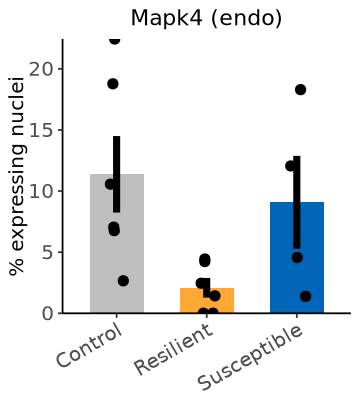

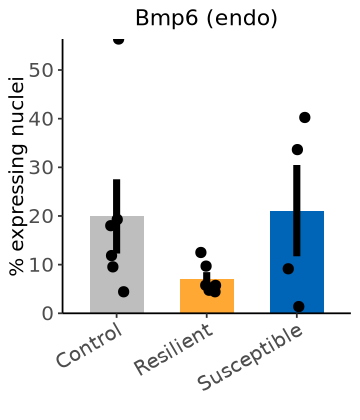

In [206]:
# Figure S7G-J

de_genes <- c("Mapk4","Bmp6")

clust <- 'endo'
sub_obj <- subset(all_samples, subset = cluster.names == clust)

for (gene in de_genes) {
    # Fetch per-cell expression and metadata
    expr_df <- FetchData(sub_obj, vars = c(gene, "outcome", "sampleID"))
    colnames(expr_df) <- c("expression", "outcome", "sampleID")

    # Define binary expression per cell
    expr_df$expressed <- expr_df$expression > 0

    # Compute percent expressing per sample
    sample_summary <- expr_df %>%
        dplyr::group_by(sampleID, outcome) %>%
        dplyr::summarise(percent_expressing = 100 * mean(expressed), .groups = 'drop')

    # Compute group-level summary stats
    group_summary <- sample_summary %>%
        dplyr::group_by(outcome) %>%
        dplyr::summarise(mean_percent = mean(percent_expressing),
                  sem = sd(percent_expressing) / sqrt(n()),
                  .groups = 'drop')

    # Plot
    options(repr.plot.width=3, repr.plot.height=3.5)
    p <- ggplot(group_summary, aes(x = outcome, y = mean_percent, fill = outcome)) +
        geom_bar(stat = "identity", position = position_dodge(), width = 0.6) +
        geom_errorbar(aes(ymin = mean_percent - sem, ymax = mean_percent + sem),
                      width = 0, linewidth=2, position = position_dodge(0.6)) +
        geom_jitter(data = sample_summary,
                    aes(x = outcome, y = percent_expressing),
                    width = 0.1, size = 2.5, shape = 21, fill = "black") +
        scale_fill_manual(values = c("gray", rev(SR_pal)), guide="none") +
        labs(x = "", y = "% expressing nuclei", title = paste0(gene, " (", clust, ")")) +
        theme_classic() + scale_y_continuous(expand=c(0, 0)) +
        theme(
            plot.title = element_text(hjust = 0.5),
            axis.text.x = element_text(size = 12, angle = 30, hjust = 1),
            axis.text.y = element_text(size = 12),
            axis.title.y = element_text(size = 12)
        )
    plot(p)
    ggsave(file=paste0("./plots/final_figures/",gene,"_",clust,"_proportion_nulei_barplot.pdf"), width=3, height=3.5, dpi=320)
}

## Figure 3

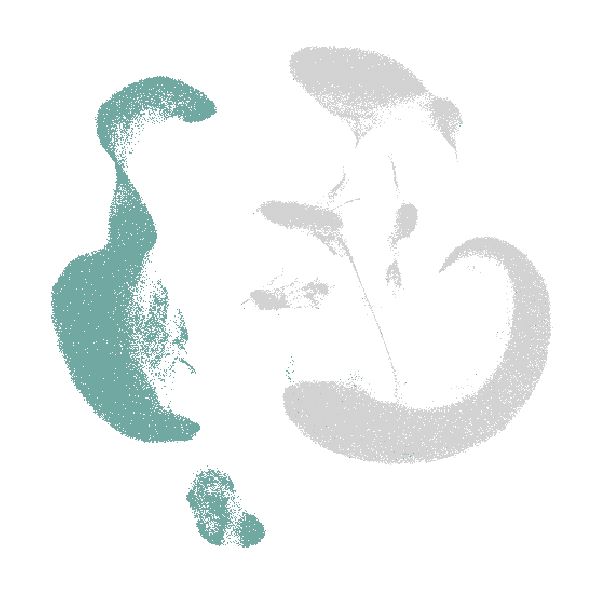

In [69]:
# Figure 3A (left)
options(repr.plot.width = 5, repr.plot.height = 5) 
DimPlot(all_samples, raster=TRUE, 
        cols=c("#71a8a2","#71a8a2","#71a8a2","lightgray","lightgray",
               "lightgray","lightgray","lightgray","lightgray")) + NoAxes() + NoLegend() 
ggsave("./plots/final_figures/all_nuclei_umap_neuron_higlight_raster.pdf", width=5, height=5, dpi=320)

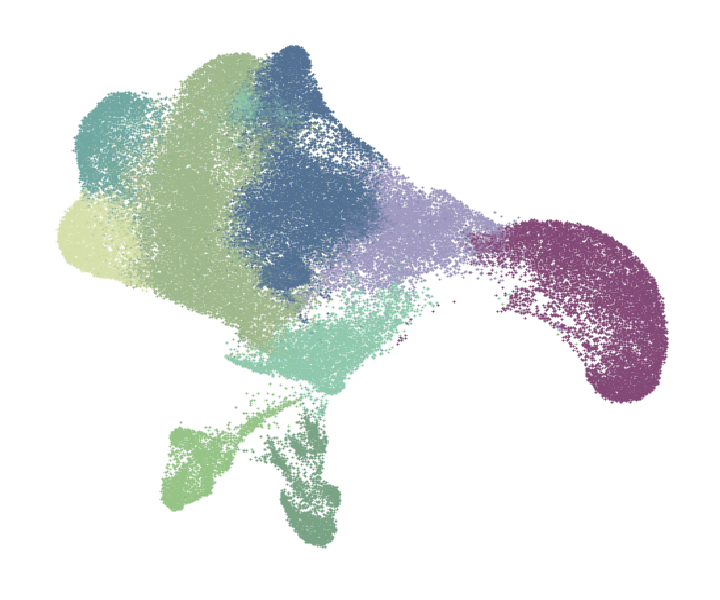

In [13]:
# Figure 3A (right)

# Read in neuron specific seurat object that was extracted and clustered in separate R scripts
neurons <- readRDS("./analysis_outputs/seurat_objects/neuron_subset.RDS")
Idents(neurons2) <- factor(Idents(neurons2), levels = c("DA","Mixed","Glut","GABA-1","GABA-2",
                                                        "GABA-3","GABA-4","GABA-5","GABA-6"))
                                                        
options(repr.plot.width = 6, repr.plot.height = 5) 
DimPlot(neurons2, label=FALSE, raster=TRUE, cols=neuron_pal, pt.size=1.5) + 
        NoAxes() + NoLegend()
ggsave('./plots/final_figures/neurons_umap_raster.pdf', width=6, height=5, dpi=320)

# umap_df <- Embeddings(neurons2, "umap") %>%
#   as.data.frame() %>%
#   cbind(neurons2@meta.data)

# options(repr.plot.width=6, repr.plot.height=5)
# ggplot(umap_df, aes(x = UMAP_1, y = UMAP_2, color = subcluster.names)) +
#   geom_point(size = 0.2, alpha = 0.5) + 
#   scale_color_manual(values = neuron_pal) +
#   theme_classic() + NoLegend() + NoAxes() 
# ggsave('./plots/final_figures/neurons_umap.pdf', width=6, height=5, dpi=320)

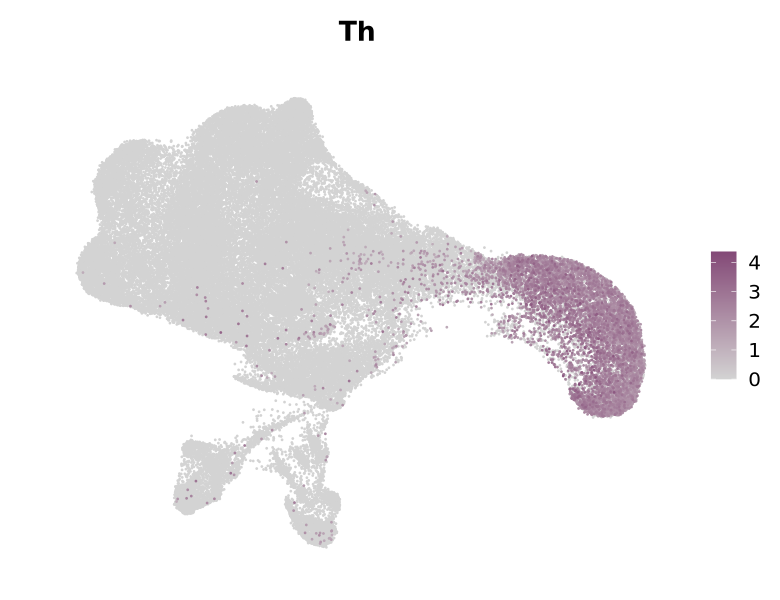

In [75]:
# Figure 3B
options(repr.plot.width=6.5, repr.plot.height=5)
FeaturePlot(neurons, raster=FALSE, order=TRUE, features="Th", cols=c("lightgray","#834977")) + NoAxes()
ggsave("./plots/neuron_subclusters_Th.pdf", width=6, height=5, dpi=320) 

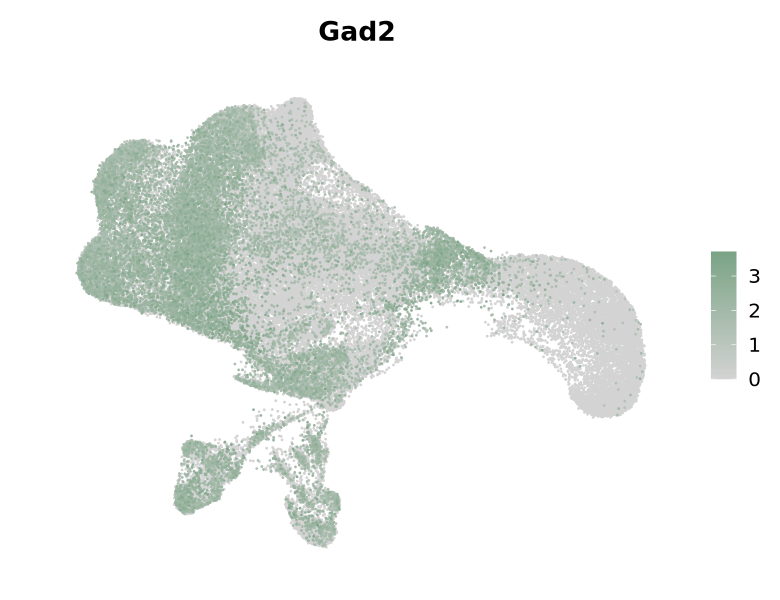

In [81]:
# Figure 3C
options(repr.plot.width=6.5, repr.plot.height=5)
FeaturePlot(neurons, raster=FALSE, order=TRUE, features="Gad2", cols=c("lightgray","#7aa385")) + NoAxes()
ggsave("./plots/neuron_subclusters_Gad2.pdf", width=6, height=5, dpi=320) 

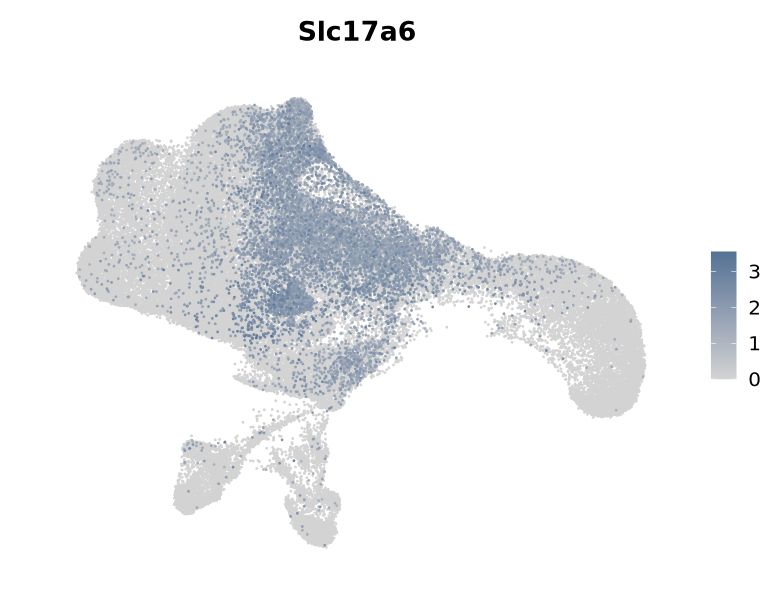

In [80]:
# Figure 3D
options(repr.plot.width=6.5, repr.plot.height=5)
FeaturePlot(neurons, raster=FALSE, order=TRUE, features="Slc17a6", cols=c("lightgray","#547294")) + NoAxes()
ggsave("./plots/neuron_subclusters_Slc17a6.pdf", width=6, height=5, dpi=320) 

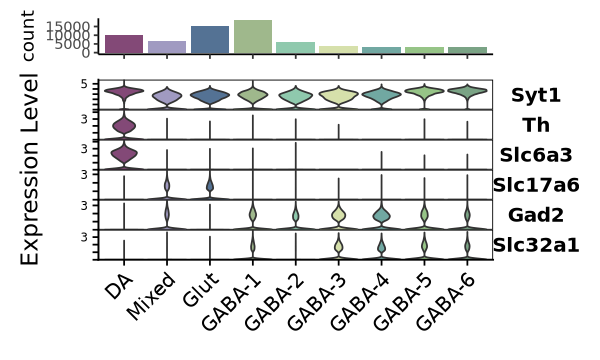

In [72]:
# Figure 3E

neuron_markers <- rev(c("Syt1",
                        "Th", "Slc6a3", 
                        "Slc17a6",
                        "Gad2","Slc32a1"))
neuron_pal2 <- c('#834977', '#A09AC1', '#547294','#9fb88c', '#8fc9ad', 
                 '#D6E0AB', '#71a8a2',  '#96c487', '#7aa385') 

levels(neurons2) <- c("DA","Mixed","Glut","GABA-1","GABA-2","GABA-3","GABA-4","GABA-5","GABA-6")

subcluster_counts <- as.data.frame(table(Idents(neurons2)))
colnames(subcluster_counts) <- c("subcluster", "count")
bar_plot <- ggplot(subcluster_counts, aes(x = subcluster, y = count, fill = subcluster)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = neuron_pal2) +
  theme_classic() +
  theme(legend.position = "none", 
    axis.title.x = element_blank(), 
    axis.text.x = element_blank())

vln_plot <- VlnPlot(neurons2, features=rev(neuron_markers), stack=TRUE, flip=TRUE, 
        fill.by="ident", cols=neuron_pal2) + NoLegend() + 
    theme(axis.title.x=element_blank())

options(repr.plot.width = 5, repr.plot.height = 3) 
bar_plot / vln_plot + plot_layout(heights = c(1, 5))
ggsave("./plots/final_figures/neuron_subclusters_vlnPlot.pdf", width=5, height=3, dpi=320)  

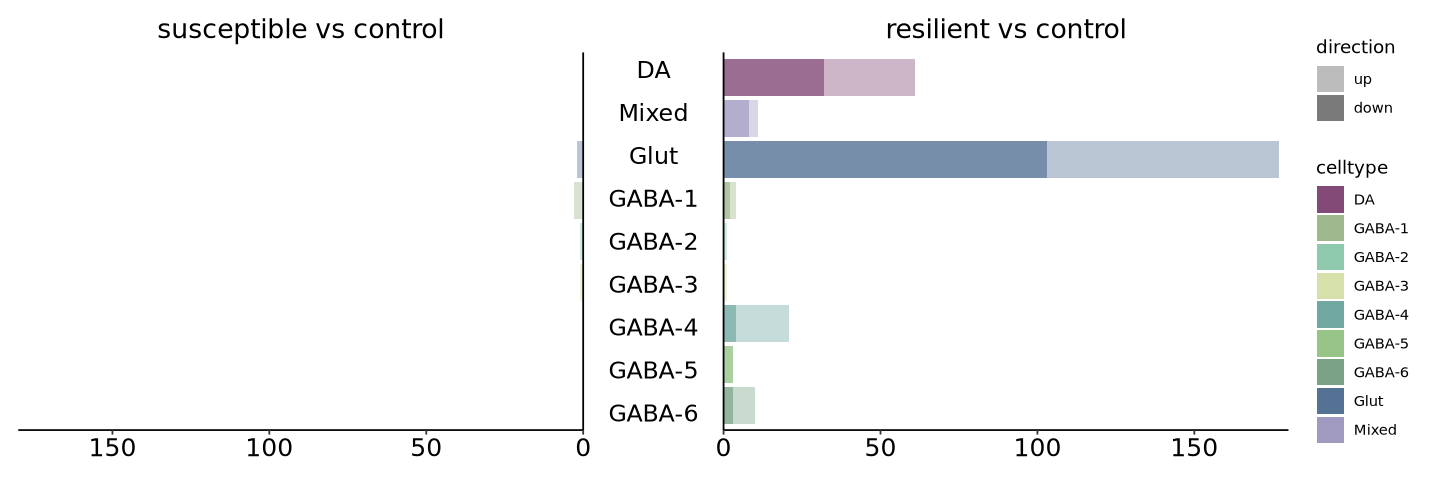

In [6]:
# Figure 3F

# Read in DEG stats calculated using DESeq2 from separate R script
neurons_deseq <- read.csv(file="./analysis_outputs/DEGs/deseq/neurons_deseq_results.csv")
neurons_deg_counts <- read.csv(file="./analysis_outputs/DEGs/deseq/neurons_deg_counts.csv")

celltype_order <- c("DA","Mixed","Glut","GABA-1","GABA-2","GABA-3","GABA-4","GABA-5","GABA-6")

names(neuron_pal) <- celltype_order

# Explicitly setting the order of the "direction" factor
neurons_deg_counts$direction <- factor(neurons_deg_counts$direction, levels = c("up", "down", "both"))

options(repr.plot.width = 12, repr.plot.height = 4)

# Plot 1: Susceptible vs Control
p_susceptible <- neurons_deg_counts %>%
  filter(comparison == "susceptible vs control",
         direction != "both") %>%
  ggplot(aes(x = factor(celltype, levels = celltype_order), 
             y = count, 
             weight = count, 
             fill = celltype, 
             alpha = direction)) + 
  geom_bar(stat = "identity", position = "stack") + 
  theme_classic() + 
  labs(title = "susceptible vs control", y = NULL) +
  scale_y_reverse(limits = c(180, 0), breaks = c(150, 100, 50, 0), expand=c(0,0)) + 
  coord_flip() +
  theme(
    legend.position = "none",
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(),  
    axis.ticks.y = element_blank(), 
    axis.title.x = element_text(size = 15, vjust = -0.25), 
    axis.text.x = element_text(size = 15, color = "black"),
    plot.title = element_text(hjust = 0.5, size = 16)
  ) +
  scale_x_discrete(position = "top", limits = rev(celltype_order)) +
  scale_fill_manual(values = neuron_pal) +
  scale_alpha_manual(values = c("up" = 0.4, "down" = 0.8))

# Plot 2: Resilient vs Control
p_resilient <- neurons_deg_counts %>%
  filter(comparison == "resilient vs control",
         direction != "both") %>%
  ggplot(aes(x = factor(celltype, levels = celltype_order), 
             y = count, 
             weight = count, 
             fill = celltype, 
             alpha = direction)) + 
  geom_bar(stat = "identity", position = "stack") + 
  theme_classic() + 
  coord_flip() +
  labs(title = "resilient vs control", y = NULL) +
  scale_y_continuous(limits = c(0, 180), breaks = c(0, 50, 100, 150), expand=c(0,0)) + 

  scale_x_discrete(limits = rev(celltype_order)) +
  theme(
    #legend.position = "none",
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(),  
    axis.ticks.y = element_blank(), 
    axis.title.x = element_text(size = 15, vjust = -0.25), 
    axis.text.x = element_text(size = 15, color = "black"),
    plot.title = element_text(hjust = 0.5, size = 16)
  ) +
  scale_fill_manual(values = neuron_pal) +
  scale_alpha_manual(values = c("up" = 0.4, "down" = 0.8))

# Create the shared celltype labels
celltype_labels <- ggplot(data.frame(celltype = factor(celltype_order, levels = rev(celltype_order)), 
                                     y = 1:9),
                          aes(x = 1, y = y, label = celltype)) +
  geom_text(aes(label = celltype), size = 5, hjust = 0.5) +  
  scale_y_reverse() +
  xlim(0.5, 1.5) + 
  theme_void() +
  theme(
    plot.margin = margin(t = 5, r = 0, b = 5, l = 0)  
  )

p_susceptible + celltype_labels + p_resilient +
  plot_layout(widths = c(1, 0.2, 1))  

ggsave("./plots/final_figures/neurons_deg_counts.pdf", width=12, height=4, dpi=320)

Warning message in wilcox.test.default(filter(neurons_deg_counts, comparison == :
“cannot compute exact p-value with ties”


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


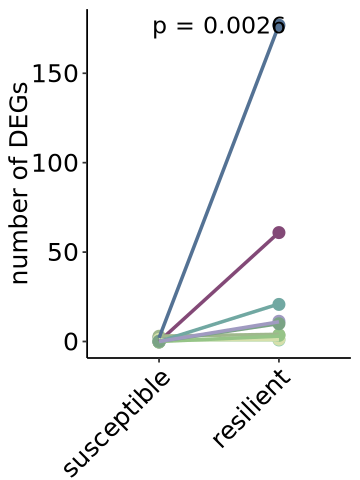

In [11]:
# Figure 3G

neurons_deg_counts$comparison <- factor(neurons_deg_counts$comparison, levels = c("susceptible vs control", "resilient vs control"))
pval <- wilcox.test(filter(neurons_deg_counts, comparison=="susceptible vs control" & direction=="both")$count,
            filter(neurons_deg_counts, comparison=="resilient vs control" & direction=="both")$count)$p.value

options(repr.plot.width = 3, repr.plot.height = 4)
ggplot(
  filter(neurons_deg_counts, 
         celltype %in% c("DA","Mixed","Glut","GABA-1","GABA-2","GABA-3","GABA-4","GABA-5","GABA-6") & 
         comparison != "susceptible vs resilient" & 
         direction == "both"), 
  aes(x = comparison, y = count, color = celltype, group = celltype)  # Group by celltype
) + 
  geom_jitter(width = 0, size = 3) +  # Increase the size of the dots here
  geom_line(size = 1) +  # Add lines connecting the same celltype
  theme_classic() + 
  NoLegend() +
  labs(y = "number of DEGs") + 
  scale_x_discrete(labels = c("susceptible", "resilient")) + 
  scale_color_manual(values = neuron_pal) +
  theme(
    legend.text = element_text(size = 15), 
    legend.title = element_text(size = 15),
    axis.title.x = element_blank(), 
    axis.text.x = element_text(size = 15, color = "black", angle = 45, hjust = 1),
    axis.title.y = element_text(size = 15, color = "black"), 
    axis.text.y = element_text(size = 15, color = "black"), 
    plot.title = element_text(hjust = 0.5, size = 16)) +
    annotate("text", x = 1.5, y = max(neurons_deg_counts$count),
      label = paste("p =", format(pval, digits = 2)), size = 5, hjust = 0.5, color = "black")
ggsave("./plots/final_figures/neurons_deg_count_summary_no_jitter.pdf", width=3, height=4, dpi=320)

In [14]:
wilcox.test(filter(neurons_deg_counts, comparison=="susceptible vs control" & direction=="both")$count,
            filter(neurons_deg_counts, comparison=="resilient vs control" & direction=="both")$count)

Warning message in wilcox.test.default(filter(neurons_deg_counts, comparison == :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  filter(neurons_deg_counts, comparison == "susceptible vs control" & direction == "both")$count and filter(neurons_deg_counts, comparison == "resilient vs control" & direction == "both")$count
W = 6.5, p-value = 0.002642
alternative hypothesis: true location shift is not equal to 0


In [3]:
# Read in DEG stats calculated using DESeq2 from separate R script
neurons_deseq <- read.csv(file="./analysis_outputs/DEGs/deseq/neurons_deseq_results.csv")
neurons_deg_counts <- read.csv(file="./analysis_outputs/DEGs/deseq/neurons_deg_counts.csv")

`geom_smooth()` using formula = 'y ~ x'


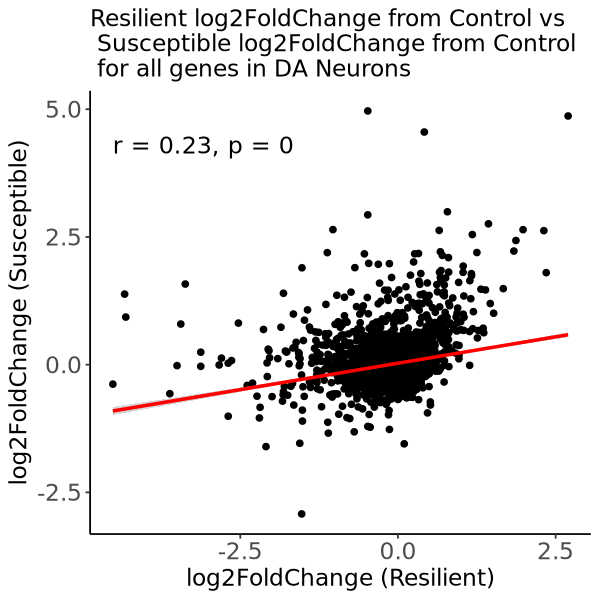

In [46]:
wide_df <- subset(neurons_deseq, celltype=="DA" & comparison != "susceptible vs resilient") %>%
  select(gene, comparison, log2FoldChange) %>%
  pivot_wider(
    names_from = comparison,
    values_from = log2FoldChange)

cor_test <- cor.test(
  wide_df$`resilient vs control`,
  wide_df$`susceptible vs control`,
  use = "complete.obs",   # ignore NA values
  method = "pearson")

r_value <- cor_test$estimate       # correlation coefficient
p_value <- cor_test$p.value        # p-value

label_text <- paste0("r = ", round(r_value, 2), 
                     ", p = ", round(p_value, 3))

options(repr.plot.width = 5, repr.plot.height = 5)        
ggplot(na.omit(wide_df), aes(x = `resilient vs control`, y = `susceptible vs control`)) +
  geom_point(na.rm=TRUE) +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  annotate("text", x = min(wide_df$`resilient vs control`, na.rm = TRUE),
                     y = max(wide_df$`susceptible vs control`-0.5, na.rm = TRUE),
                     label = label_text, hjust = 0, vjust = 1, size = 5, color = "black") +
  theme_classic() +
  theme(
    plot.title = element_text(size = 14),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)) +

  labs(
    x = "log2FoldChange (Resilient)",
    y = "log2FoldChange (Susceptible)",
    title = "Resilient log2FoldChange from Control vs \n Susceptible log2FoldChange from Control \n for all genes in DA Neurons")



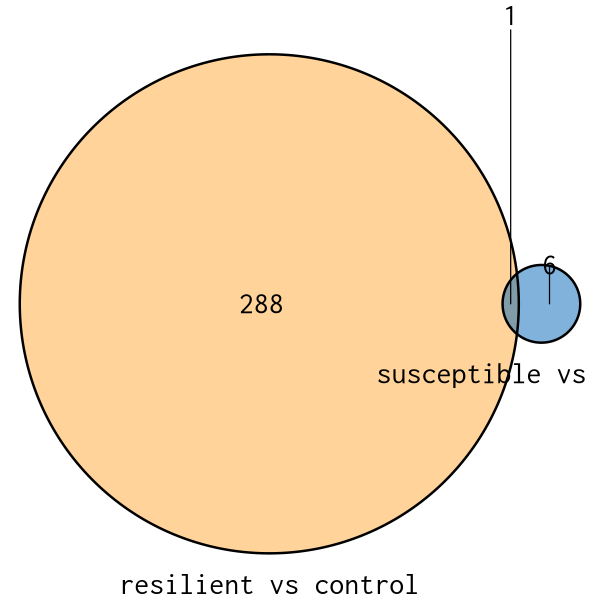

In [572]:
# Figure 3H
neurons_deseq$celltype_gene <- paste(neurons_deseq$celltype, neurons_deseq$gene, sep="_")

Rgenes <- unique(neurons_deseq[!is.na(neurons_deseq$gene) & !is.na(neurons_deseq$padj) & neurons_deseq$comparison=="resilient vs control" & neurons_deseq$padj<0.1,]$celltype_gene)
Sgenes <- unique(neurons_deseq[!is.na(neurons_deseq$gene) & !is.na(neurons_deseq$padj) & neurons_deseq$comparison=="susceptible vs control" & neurons_deseq$padj<0.1,]$celltype_gene)

options(repr.plot.width = 5, repr.plot.height = 5) 
v <- venn.diagram(x = list(Sgenes,Rgenes), category.names = c("susceptible vs control" , "resilient vs control"), 
                  lwd = 2, 
                  cex=1.5, 
                  cat.cex=1.5,
                  cat.pos = c(0, 0), 
                  fill = SR_pal, 
                  filename = NULL)
grid.draw(v)
ggsave(v, file="./plots/final_figures/neurons_SR_vs_control_venn.pdf", width=5, height=5, dpi=320)

In [36]:
# Function for creating volcano plot
plot_volcano <- function(data, group, cluster, xmin=-6, xmax=6, ymin=0, ymax=10, padj_cutoff=0.1, lfc_cap=6) {
  
  if (group == "susceptible") {
    comp <- "susceptible vs control"
    color <- RS_pal[['susceptible']]
  } else if (group == "resilient") {
    comp <- "resilient vs control"
    color <- RS_pal[['resilient']]
  } else if (group == "rs") {
    comp <- "susceptible vs resilient"
    color <- neuron_pal[[cluster]]
  } else {
    stop("Invalid group specified. Choose from 'susceptible', 'resilient', or 'susceptible vs resilient'.")
  }
  
  # Filter data based on the given cluster and comparison
  filtered_data <- filter(data, comparison == comp & celltype == cluster & !is.na(padj))
  
  # Cap log2FoldChange at +/- 6
  filtered_data$log2FoldChange <- pmin(filtered_data$log2FoldChange, lfc_cap)
  filtered_data$log2FoldChange <- pmax(filtered_data$log2FoldChange, -lfc_cap)

  # Cap pvalue at 1e-10
  filtered_data$pvalue <- pmax(filtered_data$pvalue, 1e-10)
  
  # Create volcano plot --------------------------------------------------------------------------------------------------------------
  options(repr.plot.width = 4, repr.plot.height = 3.5)
  plot <- ggplot(filtered_data, aes(x = log2FoldChange, y = -log10(pvalue), label = gene, color = padj < padj_cutoff)) + 
    geom_point(aes(size = padj < padj_cutoff)) + 
    scale_color_manual(values = c("gray", color)) + 
    scale_size_manual(values = c(1, 2)) +  
    theme_classic() +     
    theme(
      axis.text.x = element_text(size = 12, color = "black"),
      axis.title.x = element_text(size = 12, color = "black"),
      axis.text.y = element_text(size = 12, color = "black"),
      axis.title.y = element_text(size = 12, color = "black"),
      legend.position = "none") + xlim(xmin,xmax) + ylim(ymin,ymax) + 
    labs(y = "-log10(p-value)", x = "log2FoldChange", title = paste(cluster, group)) 
  
  return(plot)
}


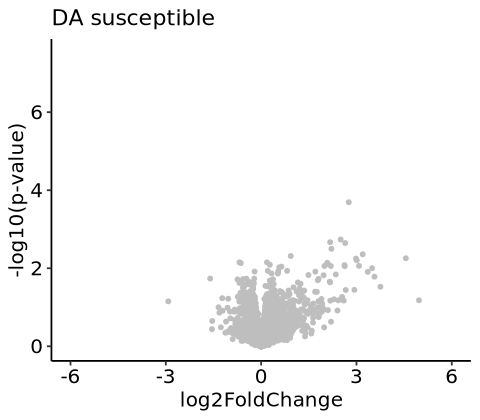

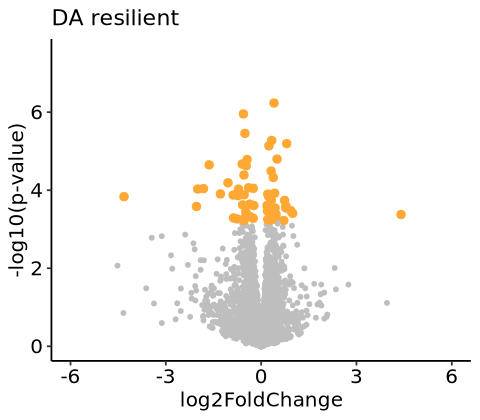

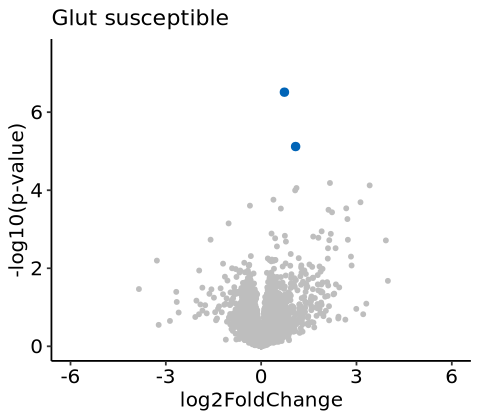

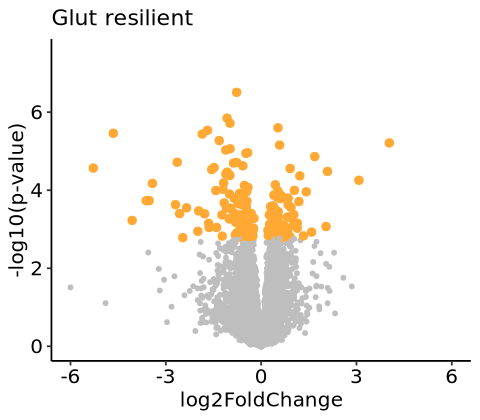

In [28]:
# Figures 3I & 3K
for (clust in c("DA", "Glut")) {
    for (g in c('susceptible', 'resilient')) {
    
        v <- plot_volcano(data=neurons_deseq, group=g, cluster=clust, xmin=-6, xmax=6, ymin=0, ymax=7.5)
        plot(v)
        ggsave(file=paste0("./plots/final_figures/",g,"_vs_control_volcano_",clust,".pdf"), width=3.5, height=3.5, dpi=320)
    }
}

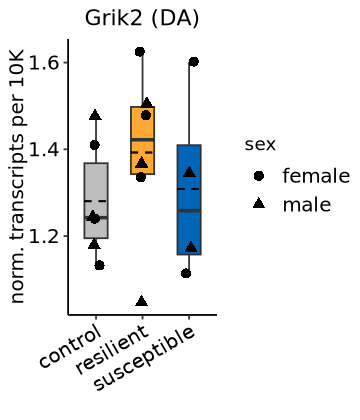

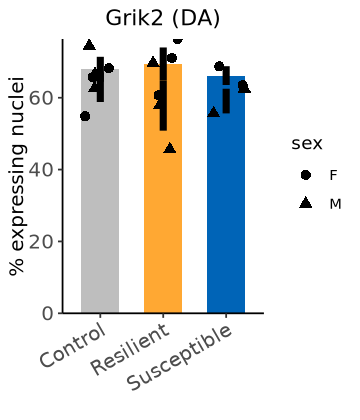

In [12]:
# Figure 3J – Combined analysis for Grik2 in DA neurons

gene <- c("Grik2")
clust <- 'DA'

sub_obj <- subset(neurons2, subset = subcluster.names == clust)

# (1) Mean normalized expression per sample
expr_df <- data.frame(FetchData(object = sub_obj, vars = c(gene, "outcome", "sampleID")))
colnames(expr_df) <- c("expression", "outcome", "sampleID")
expr_df <- data.frame(expression = tapply(expr_df$expression, expr_df$sampleID, mean))
expr_df$sampleID <- rownames(expr_df)
expr_df$sex <- ifelse(grepl("F", expr_df$sampleID), "female", "male")
expr_df$outcome <- ifelse(grepl("C", expr_df$sampleID), "control",
                    ifelse(grepl("R", expr_df$sampleID), "resilient", "susceptible"))

options(repr.plot.width=3, repr.plot.height=3.5)
p1 <- ggplot(expr_df, aes(x = outcome, y = expression, fill = outcome)) + 
    geom_boxplot(width = 0.5, position = position_dodge(0.9), outlier.shape = NA) + 
    stat_summary(fun = mean, geom = "errorbar", aes(ymax = ..y.., ymin = ..y..),
                    linewidth = 0.5, color = "black", width = 0.5, linetype = "dashed") +
    theme_classic() + 
    scale_fill_manual(values = c("gray", '#FFA833', "#0064B7"), guide = "none") +
    geom_jitter(aes(shape = sex), size = 2.5, width = 0.1) + 
    labs(x = "", y = "norm. transcripts per 10K", title = paste0(gene, " (", clust, ")")) + 
    theme(plot.title = element_text(hjust = 0.5),
            axis.text.x = element_text(size = 12, color = "black", angle = 30, hjust = 1, vjust = 1),
            axis.text.y = element_text(size = 12, color = "black"), 
            axis.title.y = element_text(size = 12, color = "black"),
            legend.text = element_text(size = 12, color = "black"))
plot(p1)
ggsave(file=paste0("./plots/final_figures/",gene,"_",clust,"_expression_boxplot.pdf"), width=4, height=3.5, dpi=320)


# (2) Percent expressing nuclei per sample
expr_df2 <- FetchData(sub_obj, vars = c(gene, "outcome", "sampleID", "sex"))
colnames(expr_df2) <- c("expression", "outcome", "sampleID", "sex")
expr_df2$expressed <- expr_df2$expression > 0

# Compute percent expressing per sample
sample_summary <- expr_df2 %>%
    dplyr::group_by(sampleID, outcome, sex) %>%
    dplyr::summarise(percent_expressing = 100 * mean(expressed), .groups = 'drop')

# Compute group-level summary stats
group_summary <- sample_summary %>%
    dplyr::group_by(outcome, sex) %>%
    dplyr::summarise(mean_percent = mean(percent_expressing),
                        sem = sd(percent_expressing) / sqrt(n()),
                        .groups = 'drop')

options(repr.plot.width=3, repr.plot.height=3.5)
p2 <- ggplot(group_summary, aes(x = outcome, y = mean_percent, fill = outcome)) +
    geom_bar(stat = "identity", position = position_dodge(), width = 0.6) +
    geom_errorbar(aes(ymin = mean_percent - sem, ymax = mean_percent + sem),
                    width = 0, linewidth = 2, position = position_dodge(0.6)) +
    geom_jitter(data = sample_summary,
                aes(x = outcome, y = percent_expressing, shape = sex),
                width = 0.3, size = 2.5, fill = "black") +
    scale_fill_manual(values = c("gray", rev(SR_pal)), guide = "none") +
    labs(x = "", y = "% expressing nuclei", title = paste0(gene, " (", clust, ")")) +
    theme_classic() +
    scale_y_continuous(expand = c(0, 0)) +
    theme(plot.title = element_text(hjust = 0.5),
            axis.text.x = element_text(size = 12, angle = 30, hjust = 1),
            axis.text.y = element_text(size = 12),
            axis.title.y = element_text(size = 12))
plot(p2)
ggsave(file=paste0("./plots/final_figures/",gene,"_",clust,"_proportion_nuclei_barplot.pdf"), width=4, height=3.5, dpi=320)


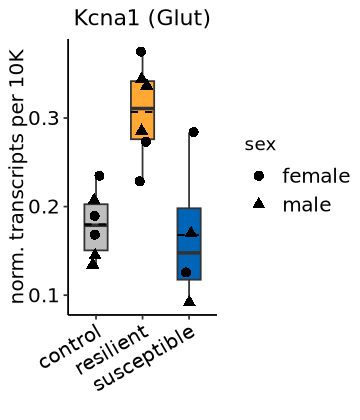

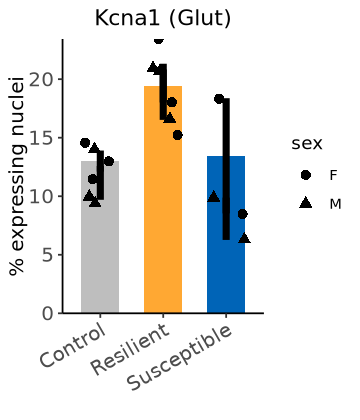

In [10]:
# Figure 3L 

gene <- c("Kcna1")
clust <- 'Glut'

sub_obj <- subset(neurons2, subset = subcluster.names == clust)

# (1) Mean normalized expression per sample
expr_df <- data.frame(FetchData(object = sub_obj, vars = c(gene, "outcome", "sampleID")))
colnames(expr_df) <- c("expression", "outcome", "sampleID")
expr_df <- data.frame(expression = tapply(expr_df$expression, expr_df$sampleID, mean))
expr_df$sampleID <- rownames(expr_df)
expr_df$sex <- ifelse(grepl("F", expr_df$sampleID), "female", "male")
expr_df$outcome <- ifelse(grepl("C", expr_df$sampleID), "control",
                    ifelse(grepl("R", expr_df$sampleID), "resilient", "susceptible"))

options(repr.plot.width=3, repr.plot.height=3.5)
p1 <- ggplot(expr_df, aes(x = outcome, y = expression, fill = outcome)) + 
    geom_boxplot(width = 0.5, position = position_dodge(0.9), outlier.shape = NA) + 
    stat_summary(fun = mean, geom = "errorbar", aes(ymax = ..y.., ymin = ..y..),
                    linewidth = 0.5, color = "black", width = 0.5, linetype = "dashed") +
    theme_classic() + 
    scale_fill_manual(values = c("gray", '#FFA833', "#0064B7"), guide = "none") +
    geom_jitter(aes(shape = sex), size = 2.5, width = 0.1) + 
    labs(x = "", y = "norm. transcripts per 10K", title = paste0(gene, " (", clust, ")")) + 
    theme(plot.title = element_text(hjust = 0.5),
            axis.text.x = element_text(size = 12, color = "black", angle = 30, hjust = 1, vjust = 1),
            axis.text.y = element_text(size = 12, color = "black"), 
            axis.title.y = element_text(size = 12, color = "black"),
            legend.text = element_text(size = 12, color = "black"))
plot(p1)
ggsave(file=paste0("./plots/final_figures/",gene,"_",clust,"_expression_boxplot.pdf"), width=4, height=3.5, dpi=320)


# (2) Percent expressing nuclei per sample
expr_df2 <- FetchData(sub_obj, vars = c(gene, "outcome", "sampleID", "sex"))
colnames(expr_df2) <- c("expression", "outcome", "sampleID", "sex")
expr_df2$expressed <- expr_df2$expression > 0

# Compute percent expressing per sample
sample_summary <- expr_df2 %>%
    dplyr::group_by(sampleID, outcome, sex) %>%
    dplyr::summarise(percent_expressing = 100 * mean(expressed), .groups = 'drop')

# Compute group-level summary stats
group_summary <- sample_summary %>%
    dplyr::group_by(outcome, sex) %>%
    dplyr::summarise(mean_percent = mean(percent_expressing),
                        sem = sd(percent_expressing) / sqrt(n()),
                        .groups = 'drop')

options(repr.plot.width=3, repr.plot.height=3.5)
p2 <- ggplot(group_summary, aes(x = outcome, y = mean_percent, fill = outcome)) +
    geom_bar(stat = "identity", position = position_dodge(), width = 0.6) +
    geom_errorbar(aes(ymin = mean_percent - sem, ymax = mean_percent + sem),
                    width = 0, linewidth = 2, position = position_dodge(0.6)) +
    geom_jitter(data = sample_summary,
                aes(x = outcome, y = percent_expressing, shape = sex),
                width = 0.3, size = 2.5, fill = "black") +
    scale_fill_manual(values = c("gray", rev(SR_pal)), guide = "none") +
    labs(x = "", y = "% expressing nuclei", title = paste0(gene, " (", clust, ")")) +
    theme_classic() +
    scale_y_continuous(expand = c(0, 0)) +
    theme(plot.title = element_text(hjust = 0.5),
            axis.text.x = element_text(size = 12, angle = 30, hjust = 1),
            axis.text.y = element_text(size = 12),
            axis.title.y = element_text(size = 12))
plot(p2)
ggsave(file=paste0("./plots/final_figures/",gene,"_",clust,"_proportion_nuclei_barplot.pdf"), width=4, height=3.5, dpi=320)


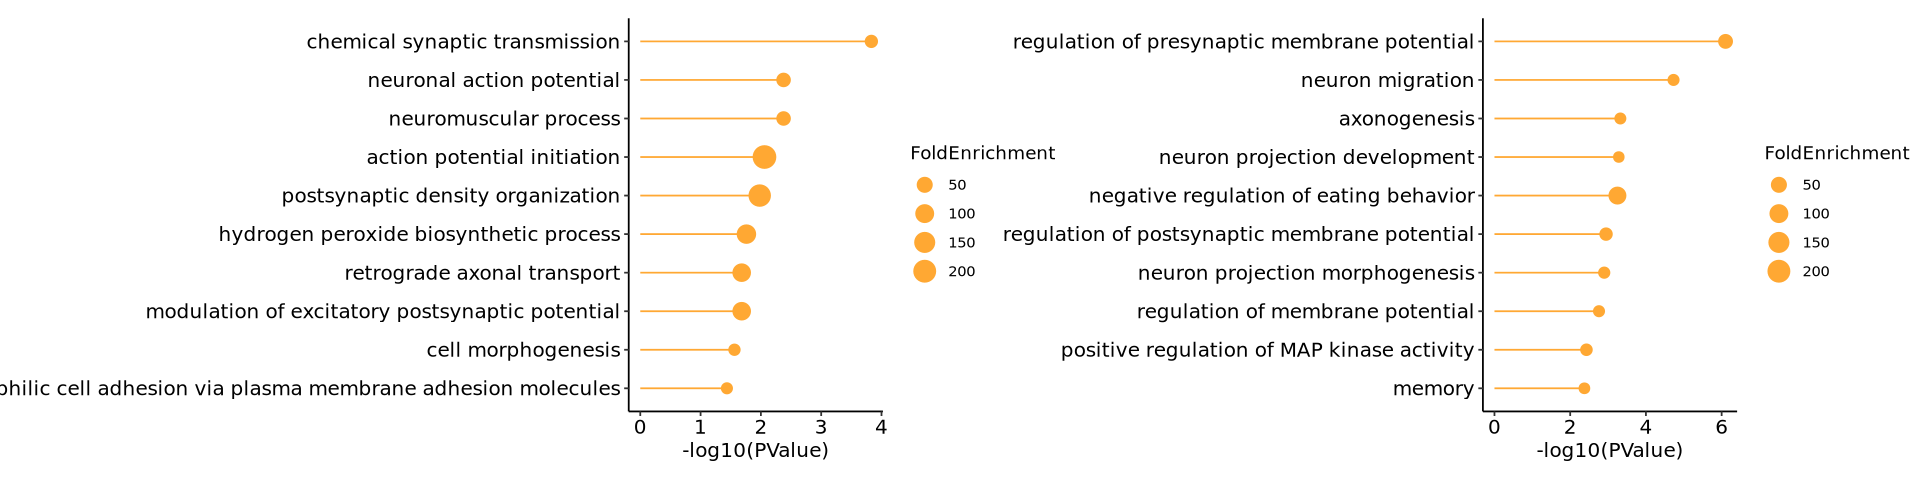

In [11]:
# Figures 3M-N

# Read in GO results for DA and Glut clusters calculated using DAVID online
go_da <- data.table::fread(file="/jukebox/pena/Addie/defeat-snseq-paper/david_res_DA_cluster_GOTERM_BP_DIRECT.txt", sep="\t")
go_gl <- data.table::fread(file="/jukebox/pena/Addie/defeat-snseq-paper/david_res_Glut_cluster_GOTERM_BP_DIRECT.txt", sep="\t")

# Rename the column "Fold Enrichment" to "FoldEnrichment"
colnames(go_da)[colnames(go_da) == "Fold Enrichment"] <- "FoldEnrichment"
colnames(go_gl)[colnames(go_gl) == "Fold Enrichment"] <- "FoldEnrichment"

# Remove all before and up to "~":
go_da$Term <- gsub(".*~","",go_da$Term)
go_gl$Term <- gsub(".*~","",go_gl$Term)

min_size <- min(c(go_gl$FoldEnrichment, go_da$FoldEnrichment), na.rm = TRUE)
max_size <- max(c(go_gl$FoldEnrichment, go_da$FoldEnrichment), na.rm = TRUE)

# DA plot
plot_da <- go_da[order(log10(go_da$PValue)),][1:10] %>%
  ggplot(aes(x = fct_reorder(Term, -log10(PValue)), y = -log10(PValue))) +
    geom_segment(aes(x = fct_reorder(Term, -log10(PValue)), 
                     xend = fct_reorder(Term, -log10(PValue)), 
                     y = 0, yend = -log10(PValue)), color = SR_pal[2]) +
    geom_point(aes(size = FoldEnrichment), color = SR_pal[2]) +
    coord_flip() +
    scale_size_continuous(range = c(2, 6), limits = c(min_size, max_size)) +  
    theme_classic() +
    theme(axis.text.x = element_text(color = "black", size = 12),
          axis.text.y = element_text(color = "black", size = 12),
          axis.title.x = element_text(color = "black", size = 12),
          axis.title.y = element_blank())

# Glut plot
plot_gl <- go_gl[order(log10(go_gl$PValue)),][1:10] %>%
  ggplot(aes(x = fct_reorder(Term, -log10(PValue)), y = -log10(PValue))) +
    geom_segment(aes(x = fct_reorder(Term, -log10(PValue)), 
                     xend = fct_reorder(Term, -log10(PValue)), 
                     y = 0, yend = -log10(PValue)), color = SR_pal[2]) +
    geom_point(aes(size = FoldEnrichment), color = SR_pal[2]) +
    coord_flip() +
    scale_size_continuous(range = c(2, 6), limits = c(min_size, max_size)) +  
    theme_classic() +
    theme(axis.text.x = element_text(color = "black", size = 12),
          axis.text.y = element_text(color = "black", size = 12),
          axis.title.x = element_text(color = "black", size = 12),
          axis.title.y = element_blank())

combined_plot <- plot_da | plot_gl  

# Show the combined plot
options(repr.plot.width = 16, repr.plot.height = 4) 
combined_plot

ggsave(file="./plots/final_figures/resilient_DA-Glut_GO.pdf", width=16, height=4, dpi=320)

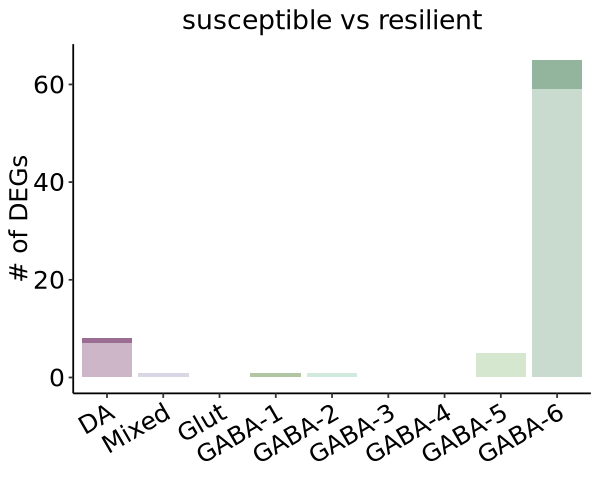

In [15]:
# Figure 3O
celltype_order <- c("DA","Mixed","Glut","GABA-1","GABA-2","GABA-3","GABA-4","GABA-5","GABA-6")

names(neuron_pal) <- celltype_order

options(repr.plot.width = 5, repr.plot.height = 4)

p_rs <- neurons_deg_counts %>%
  filter(comparison == "susceptible vs resilient",
         direction != "both") %>%
  ggplot(aes(x = factor(celltype, levels = celltype_order), 
             y = count, 
             weight = count, 
             fill = celltype, 
             alpha = direction)) + 
  geom_bar(stat = "identity", position = "stack") + 
  theme_classic() + 
  labs(title = "susceptible vs resilient", y = "# of DEGs") +
  theme(
    legend.position = "none",
    axis.title.x = element_blank(), 
    axis.text.y = element_text(size=15, color="black"),  
    axis.title.y = element_text(size=15, color="black"), 
    axis.text.x = element_text(size=15, color="black", angle=30, hjust=1),
    plot.title = element_text(hjust=0.5, size=16)
  ) +
  #scale_x_discrete(position = "top", limits = rev(celltype_order)) +
  scale_fill_manual(values = neuron_pal) +
  scale_alpha_manual(values = c("up" = 0.4, "down" = 0.8))

p_rs
ggsave("./plots/final_figures/neurons_RvS_deg_counts.pdf", width=5, height=4, dpi=320)

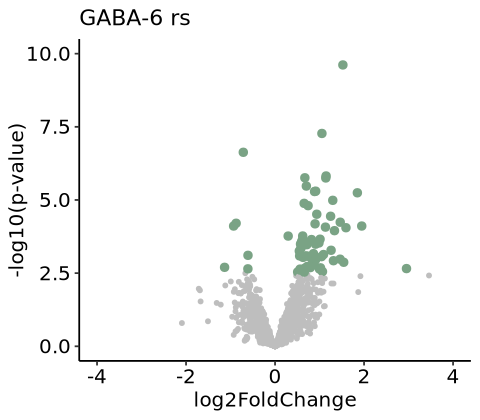

In [38]:
# Figure 3P
clust <- "GABA-6"
g="rs"
v <- plot_volcano(data=neurons_deseq, group=g, cluster=clust, xmin=-4, xmax=4, ymin=0, ymax=10)
plot(v)
ggsave("./plots/final_figures/GABA6_RvS_volcano.pdf", width=4, height=4, dpi=320)

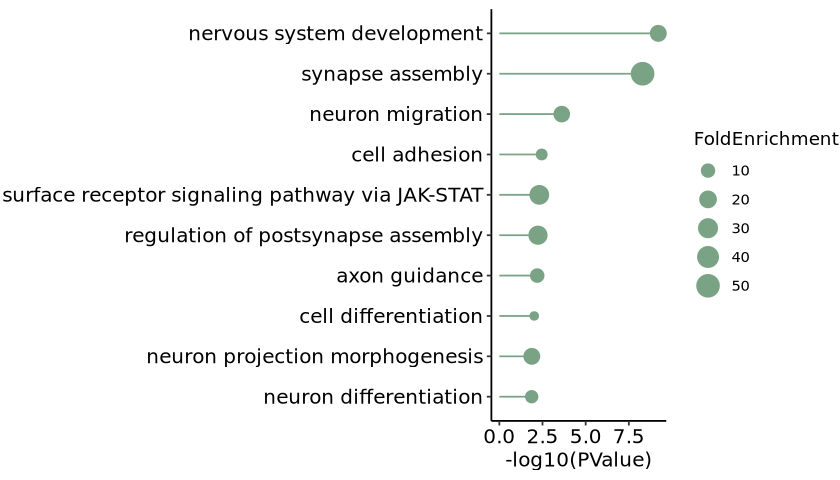

In [9]:
# Figure 3Q

# Read in GO results for GABA-6 cluster calculated using DAVID online
go_gaba6 <- data.table::fread(file="/jukebox/pena/Addie/defeat-snseq-paper/GO_results/david_res_GABA6_cluster_GOTERM_BP_DIRECT.txt", sep="\t")

# Rename the column "Fold Enrichment" to "FoldEnrichment"
colnames(go_gaba6)[colnames(go_gaba6) == "Fold Enrichment"] <- "FoldEnrichment"

# Remove all before and up to "~":
go_gaba6$Term <- gsub(".*~","",go_gaba6$Term)

options(repr.plot.width = 7, repr.plot.height = 4) 
go_gaba6[order(log10(go_gaba6$PValue)),][1:10] %>%
  ggplot(aes(x = fct_reorder(Term, -log10(PValue)), y = -log10(PValue))) +
    geom_segment(aes(x = fct_reorder(Term, -log10(PValue)), 
                     xend = fct_reorder(Term, -log10(PValue)), 
                     y = 0, yend = -log10(PValue)), color = neuron_pal[["GABA-6"]]) +
    geom_point(aes(size = FoldEnrichment), color = neuron_pal[["GABA-6"]]) +
    coord_flip() +
    scale_size_continuous(range = c(2, 6)) +  
    theme_classic() +
    theme(axis.text.x = element_text(color = "black", size = 12),
          axis.text.y = element_text(color = "black", size = 12),
          axis.title.x = element_text(color = "black", size = 12),
          axis.title.y = element_blank())

ggsave(file="./plots/final_figures/RvS_GABA6_GO.pdf", width=7, height=4, dpi=320)

### Figure S8: GABA heterogeneity

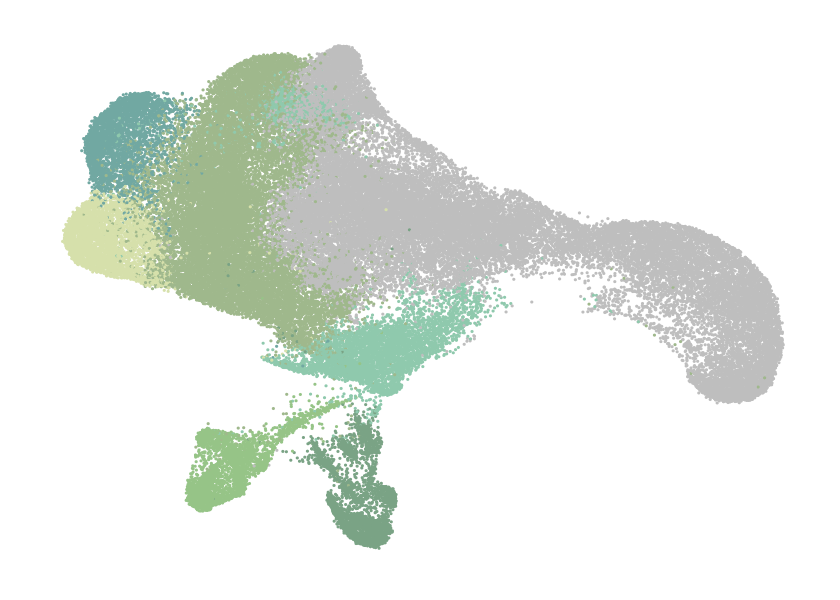

In [215]:
# Figure S8A
options(repr.plot.width = 7, repr.plot.height = 5) #
DimPlot(neurons2, label=FALSE, raster=FALSE, cols=c("gray","gray","gray",neuron_pal[4:9]), pt.size=0.1) + 
        NoAxes() + NoLegend()
ggsave('./plots/final_figures/gaba_neurons_umap.pdf', width=7, height=5, dpi=320)

In [163]:
# Find markers for each GABA subcluster

gaba_clusters <- paste0("GABA-", 1:6)
gaba <- subset(neurons2, subset = subcluster.names %in% gaba_clusters)

Idents(gaba) <- "subcluster.names"

gaba_markers <- FindAllMarkers(
  object = gaba,
  only.pos = TRUE, # Only return markers upregulated in each cluster
  min.pct = 0.25, # Minimum percent of cells expressing the gene
  logfc.threshold = 0.25, # Minimum log fold change
  test.use = "wilcox")

write.csv(gaba_markers, file="./analysis_outputs/gaba_subcluster_markers.csv", row.names=FALSE)

Calculating cluster GABA-1

Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Calculating cluster GABA-2

Calculating cluster GABA-3

Calculating cluster GABA-4

Calculating cluster GABA-5

Calculating cluster GABA-6



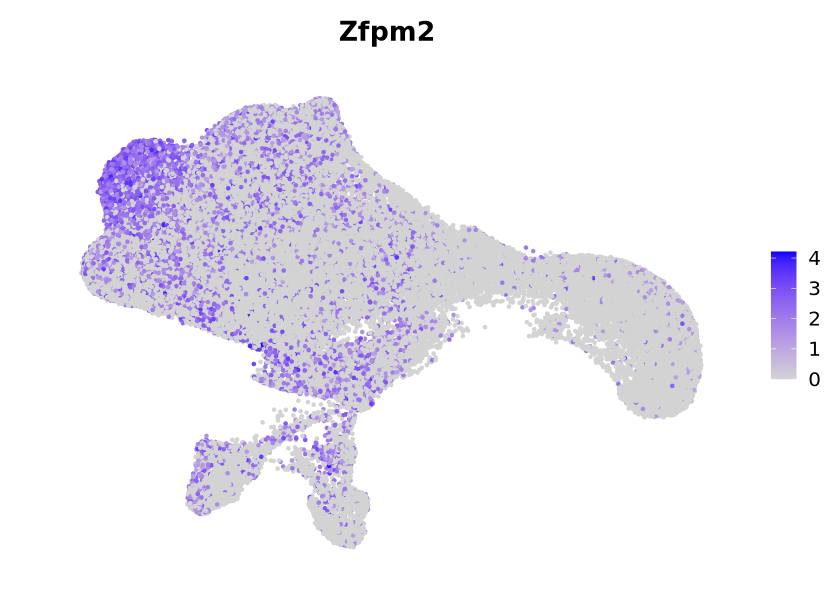

In [408]:
# Figures S8B-G
genes <- c("Htr2c", "Zfpm2", "Gabra1", "Meis2", "Sox6", "Sst")
for (gene in genes){
    options(repr.plot.width = 7, repr.plot.height = 5) 
    FeaturePlot(neurons2, features=gene, pt.size=0.5, order=FALSE) + NoAxes()
    ggsave(paste0('./plots/final_figures/neurons_',gene,'_expression.pdf'), width=7, height=5, dpi=320)
}

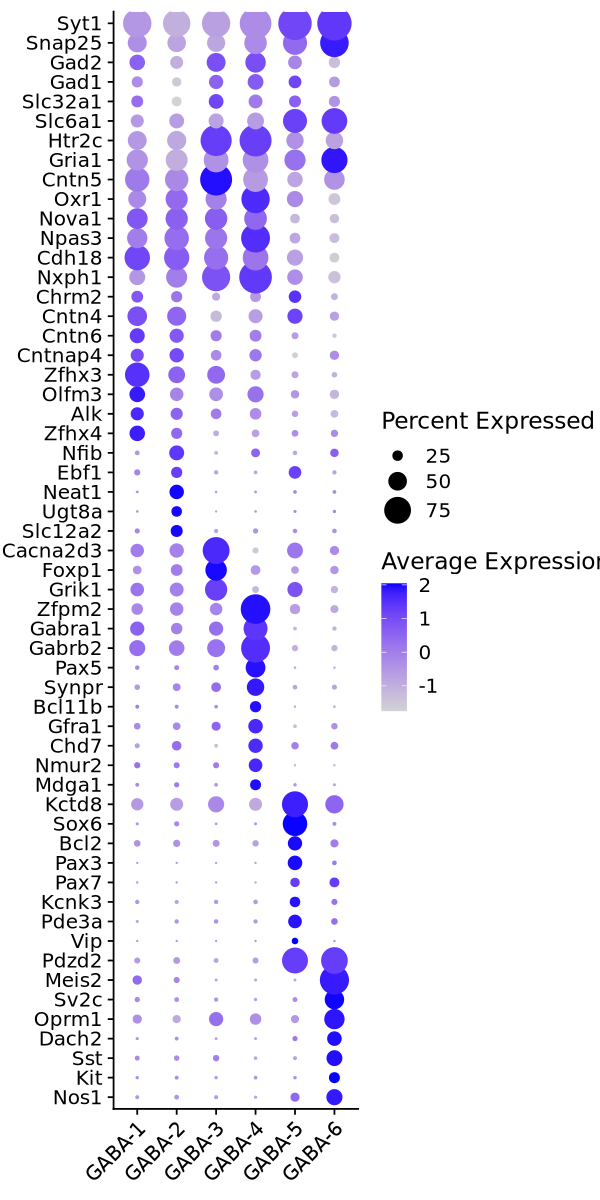

In [405]:
# FIgure S8H
options(repr.plot.width = 5, repr.plot.height = 10) 
DotPlot(gaba, dot.scale=9, #cols=c("lightgray","#38ab9e"),
    features=c("Nos1","Kit","Sst","Dach2", "Oprm1","Sv2c","Meis2","Pdzd2",
        "Vip","Pde3a","Kcnk3","Pax7","Pax3","Bcl2","Sox6","Kctd8",
        "Mdga1","Nmur2","Chd7","Gfra1","Bcl11b","Synpr","Pax5","Gabrb2","Gabra1","Zfpm2",
        "Grik1","Foxp1","Cacna2d3",
        "Slc12a2","Ugt8a","Neat1","Ebf1","Nfib",
        "Zfhx4",
        "Alk","Olfm3",
        "Zfhx3","Cntnap4","Cntn6","Cntn4",
        "Chrm2","Nxph1","Cdh18","Npas3","Nova1","Oxr1",
        "Cntn5","Gria1","Htr2c",
        "Slc6a1","Slc32a1","Gad1","Gad2","Snap25","Syt1")) + 
    coord_flip() +
    theme(axis.text.x=element_text(angle=45, hjust=1, size=12),
          axis.text.y=element_text(size=12),
          axis.title.x=element_blank(),
          axis.title.y=element_blank()) 
ggsave(paste0('./plots/final_figures/gaba_neurons_dotplot.pdf'), width=5, height=10, dpi=320)

### Figure S9: DA neuron heterogeneity

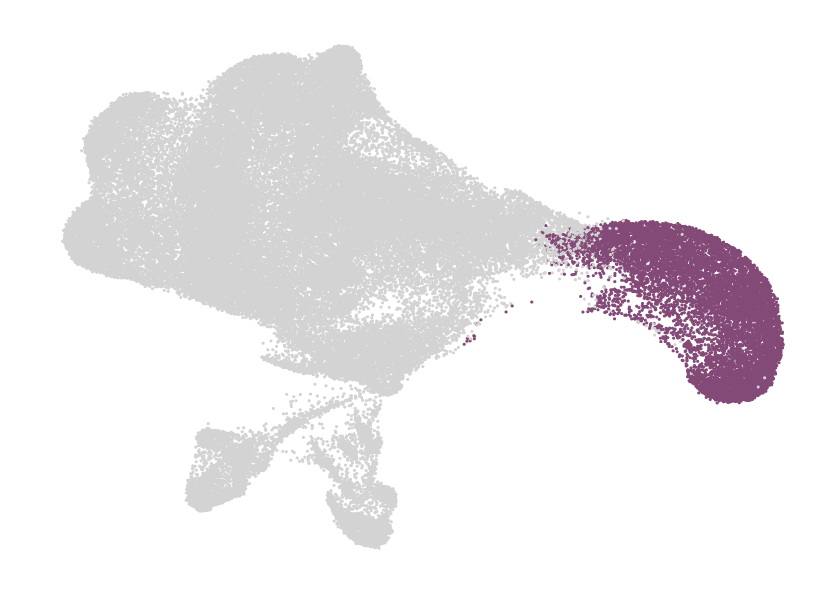

In [12]:
# Figure S9A (left)
options(repr.plot.width = 7, repr.plot.height = 5) 
DimPlot(neurons2, label=FALSE, raster=FALSE, cols=c(neuron_pal[1],rep("lightgray",8)), pt.size=0.1) + 
        NoAxes() + NoLegend()
ggsave('./plots/final_figures/neurons_umap_da_colored.pdf', width=7, height=5, dpi=320)

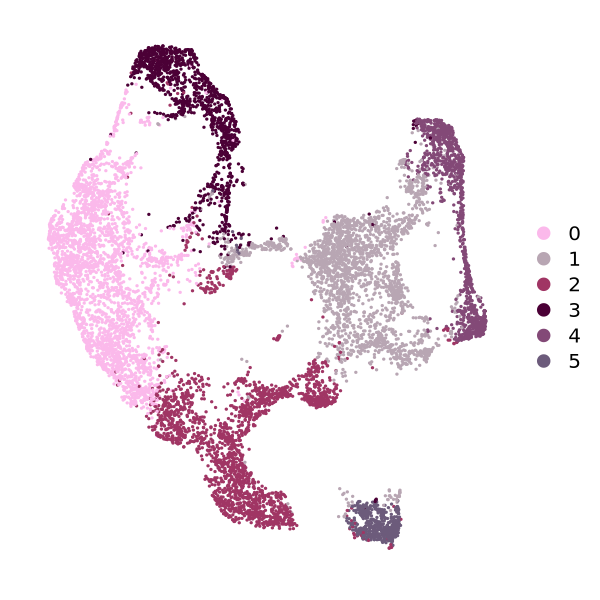

In [6]:
# Figure S9A (right)
da <- readRDS("./analysis_outputs/seurat_objects/da.RDS")
DefaultAssay(da) = "RNA"

options(repr.plot.width = 5, repr.plot.height = 5)
DimPlot(da, reduction="umap", cols=da_pal, label=FALSE, repel=TRUE) + NoAxes() 
ggsave(filename="./plots/final_figures/da_umap.pdf", width=5, height=5, dpi=320)

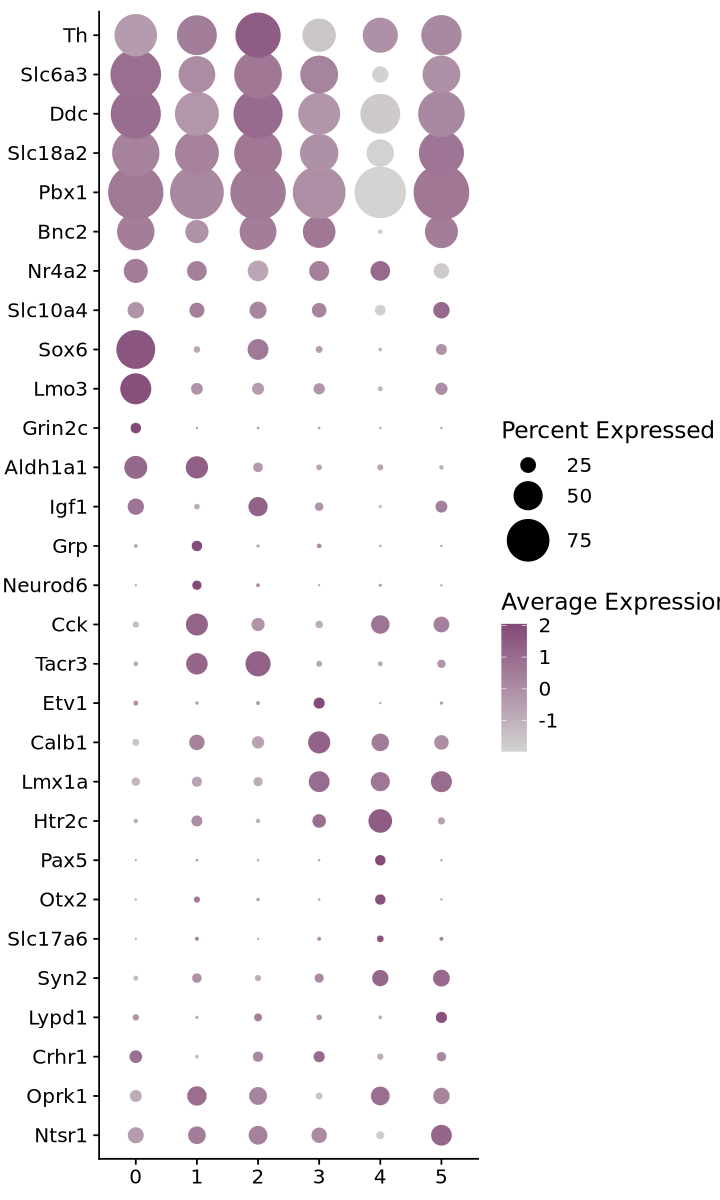

In [3]:
# Figure S9B
da_marker_list <- c("Th","Slc6a3","Ddc","Slc18a2","Pbx1","Bnc2","Nr4a2","Slc10a4",
                    "Sox6","Lmo3","Grin2c","Aldh1a1","Igf1","Grp","Neurod6","Cck",
                    "Tacr3","Etv1","Calb1","Lmx1a","Htr2c","Pax5","Otx2","Slc17a6",
                    "Syn2","Lypd1")

options(repr.plot.width = 6, repr.plot.height = 10) 
DotPlot(da, dot.scale=15, cols=c("lightgray","#834977"),
    features=c(rev(da_marker_list))) + 
    coord_flip() +
    theme(axis.text.x=element_text(size=12),
          axis.text.y=element_text(size=12),
          axis.title.x=element_blank(),
          axis.title.y=element_blank()) 
ggsave(filename="./plots/final_figures/da_subcluster_dotplot.pdf", width=5, height=10, dpi=320)

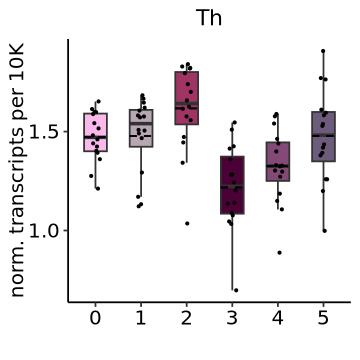

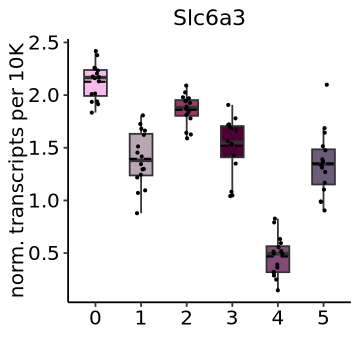

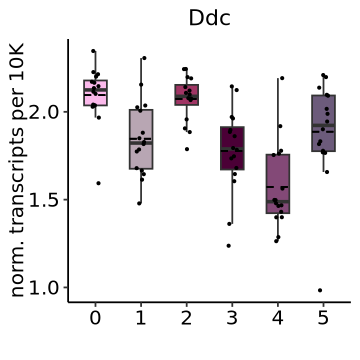

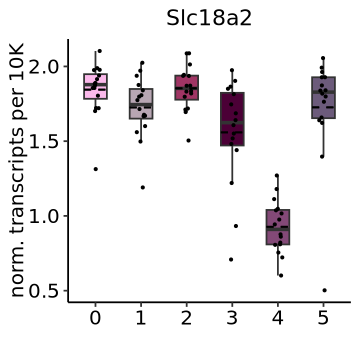

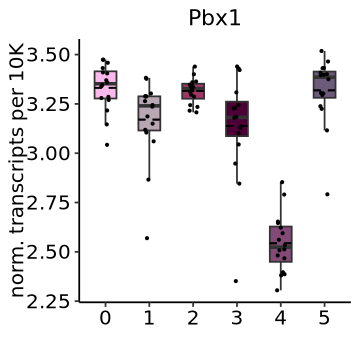

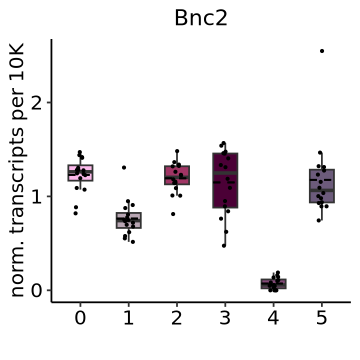

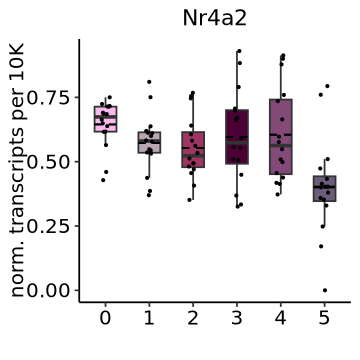

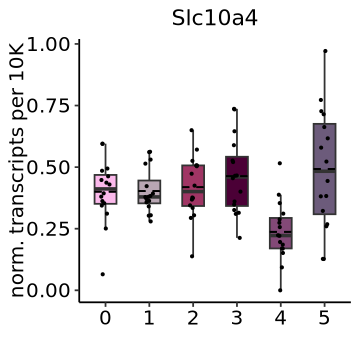

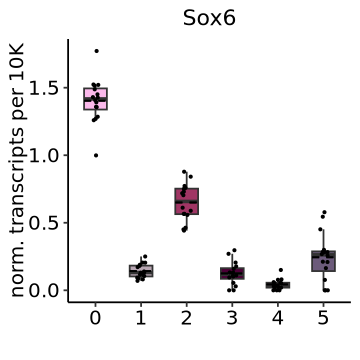

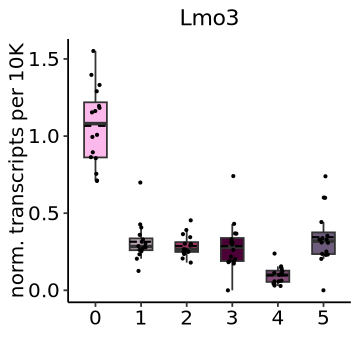

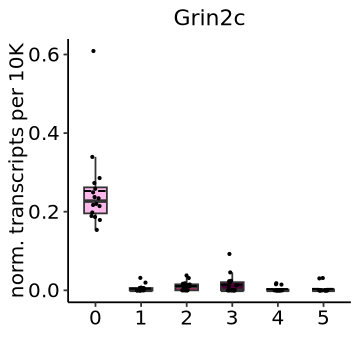

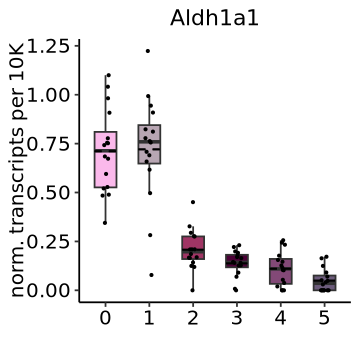

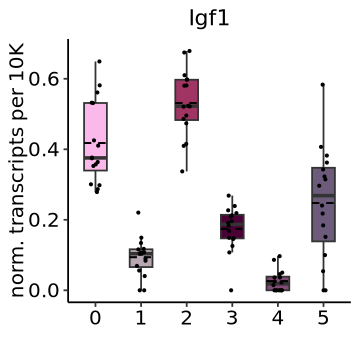

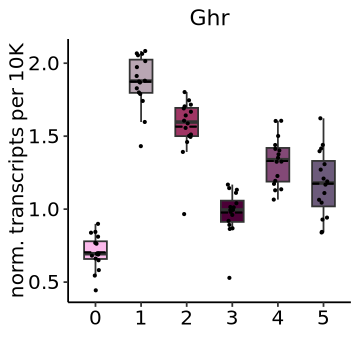

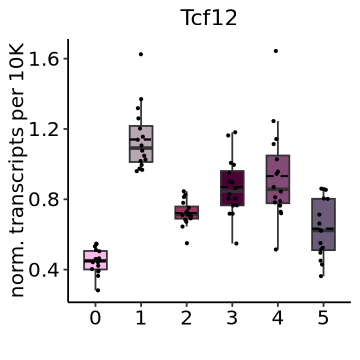

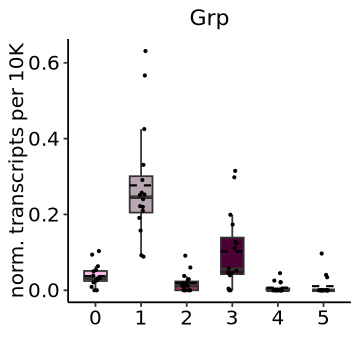

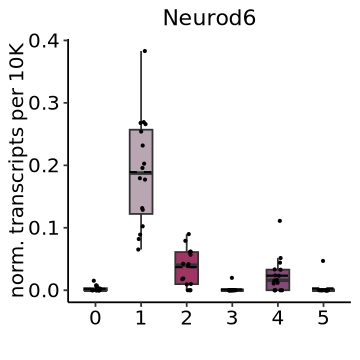

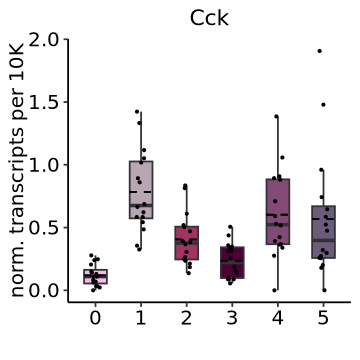

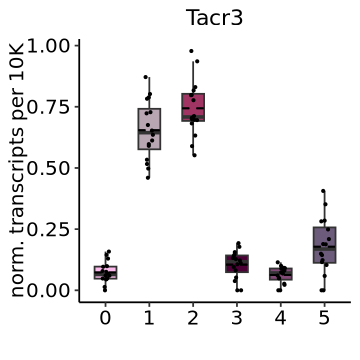

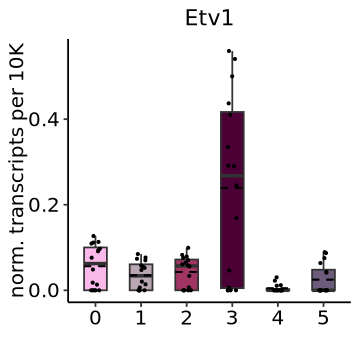

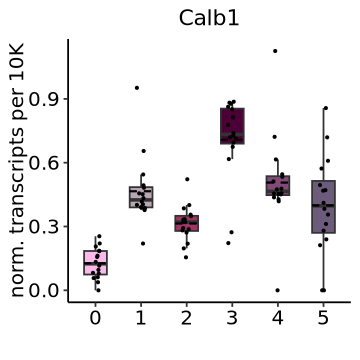

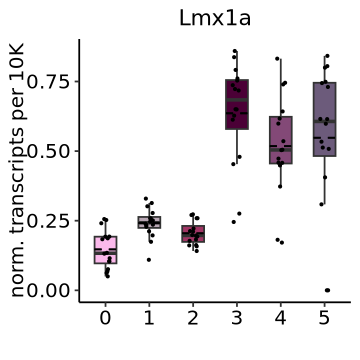

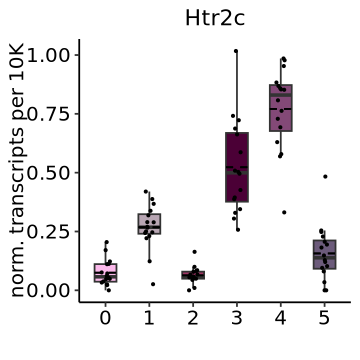

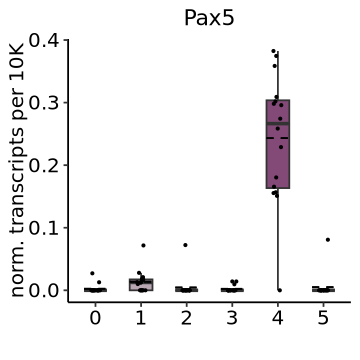

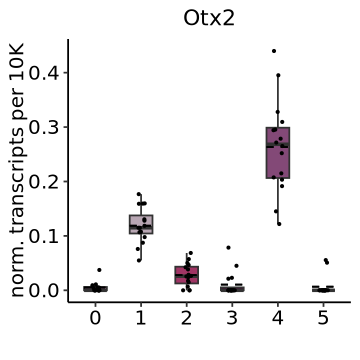

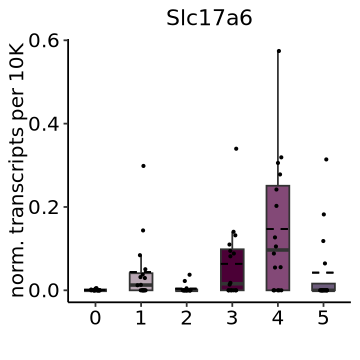

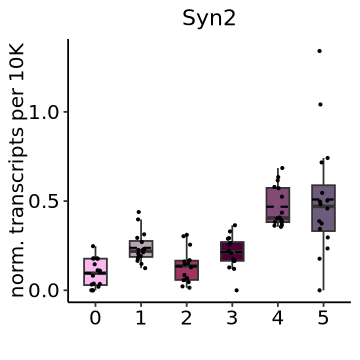

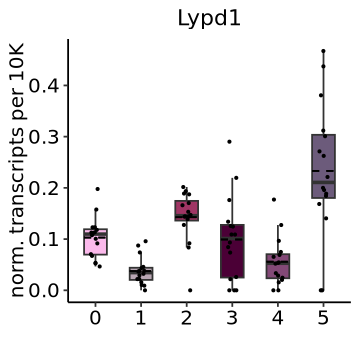

In [40]:
# Figure S9C-H
for (gene in da_marker_list){
    options(repr.plot.width=3, repr.plot.height=3)
    expr_df <- data.frame(FetchData(object = da, 
                                    vars = c(gene,"outcome","sampleID","da.subclusters")))
    colnames(expr_df) <- c("expression","outcome","sampleID","cluster")
    expr_df <- expr_df %>%
        dplyr::group_by(cluster, sampleID) %>%
        dplyr::summarise(expression = mean(expression), .groups = "drop")

    p <- ggplot(expr_df, aes(x=cluster, y=expression, fill=cluster)) + 
        geom_boxplot(width=0.5, outlier.shape = NA) +  # Suppress default outlier points
        stat_summary(fun=mean, geom="errorbar", aes(ymax = ..y.., ymin = ..y..), linewidth=0.5, 
                    color="black", width=0.5, linetype="dashed") +
        theme_classic() + scale_fill_manual(values=da_pal, guide="none") +
        geom_jitter(size=0.5, width=0.1) +  # Jitter for all points, including outliers
        labs(x="", y="norm. transcripts per 10K", title=gene) + 
            theme(plot.title=element_text(hjust=0.5)) + 
        theme(axis.text.x=element_text(size=12, color="black"), 
            axis.text.y=element_text(size=12, color="black"), 
            axis.title.y=element_text(size=12, color="black"),
            legend.text=element_text(size=12, color="black")) + NoLegend()
    plot(p)
    ggsave(filename=paste0("./plots/final_figures/da_subclusters_",gene,"_expression.pdf"), width=3, height=3, dpi=320)
}


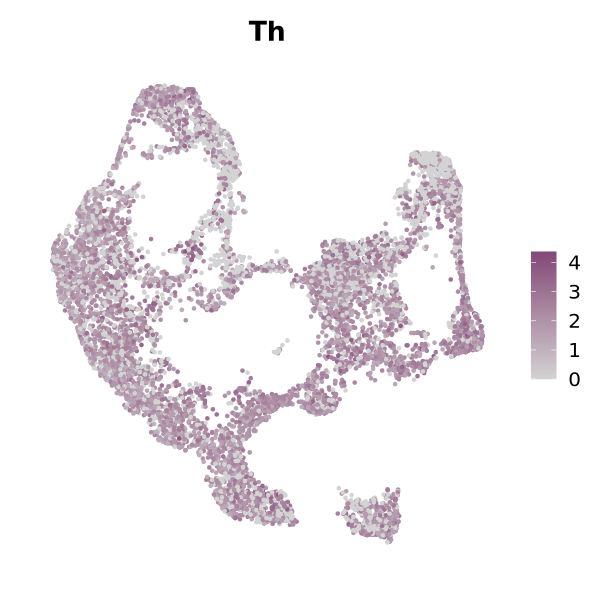

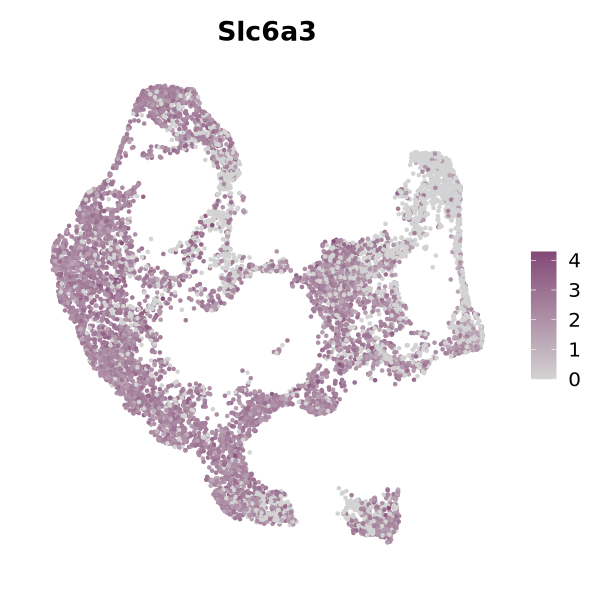

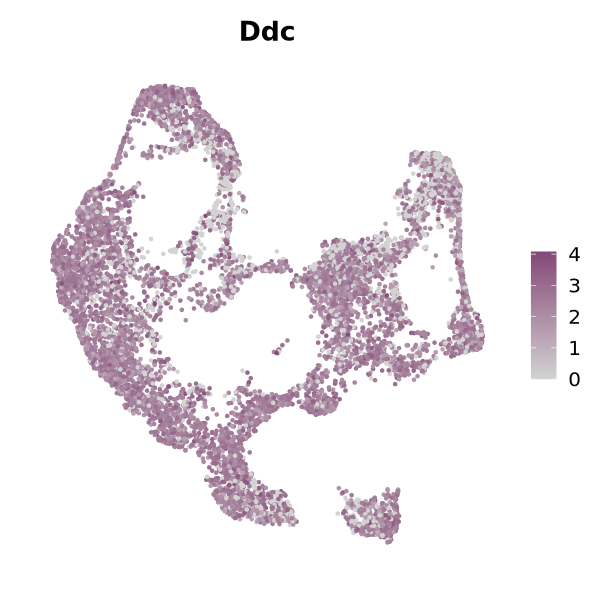

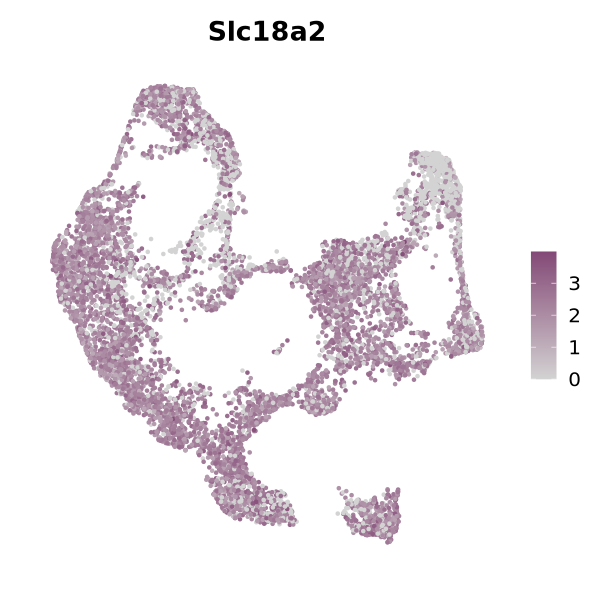

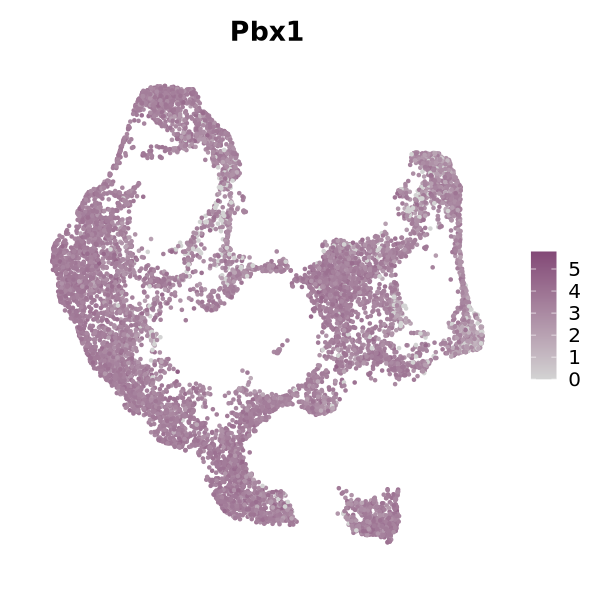

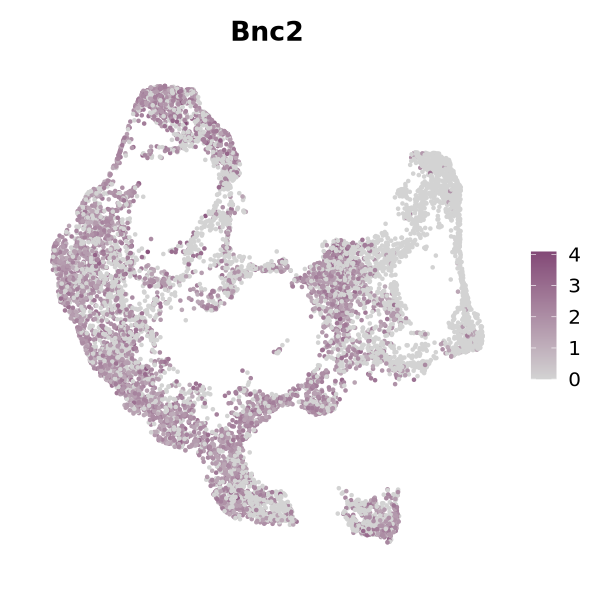

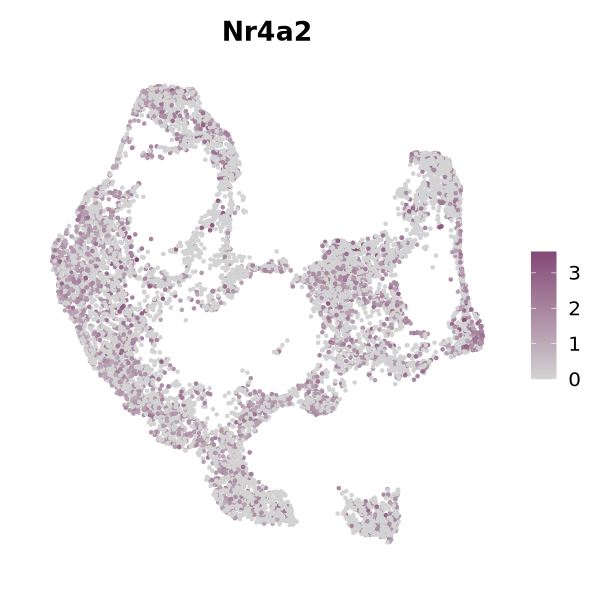

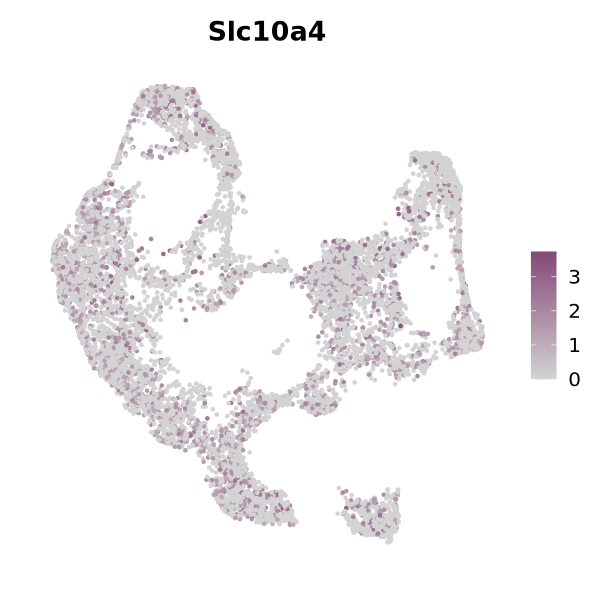

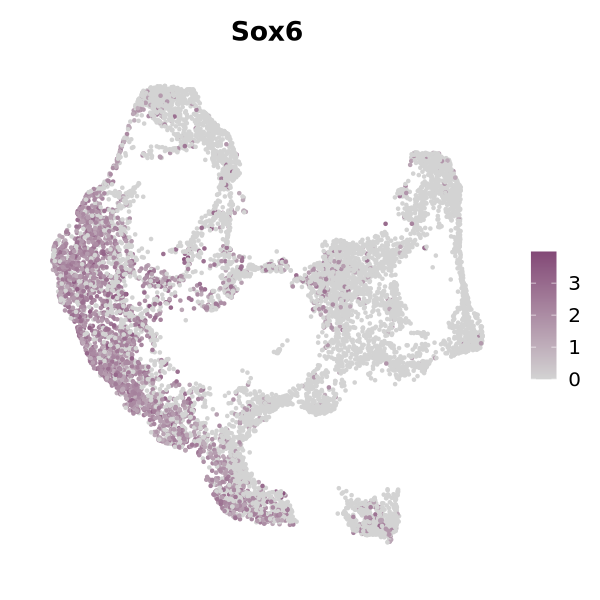

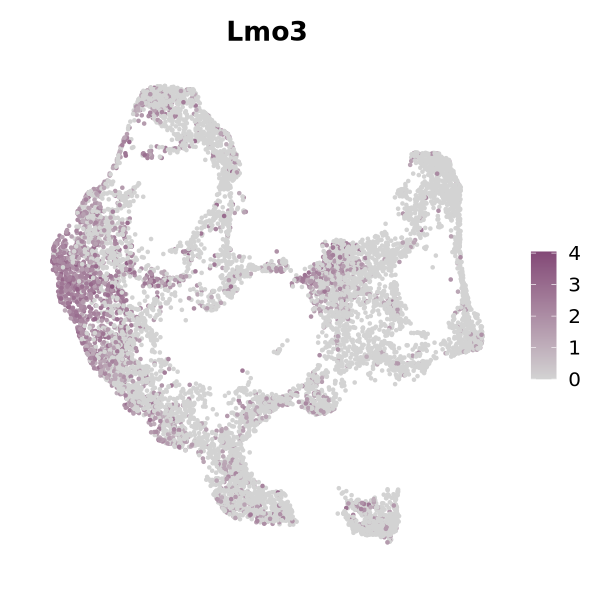

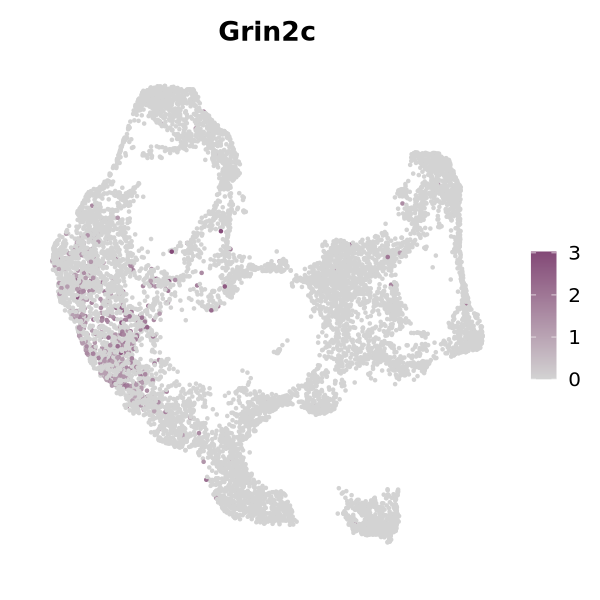

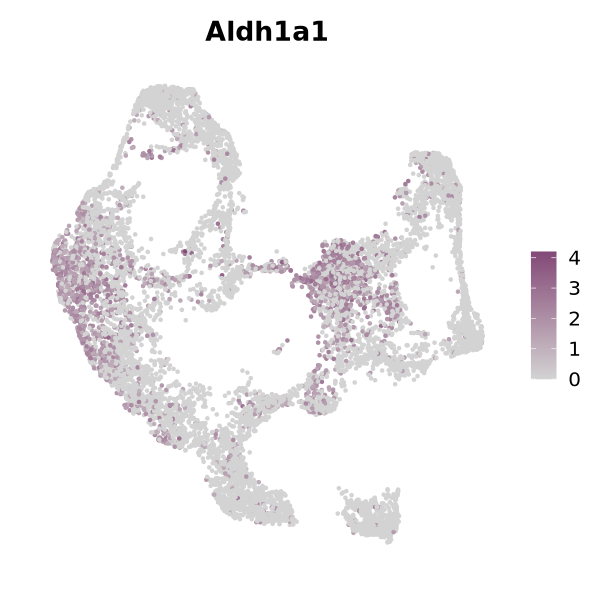

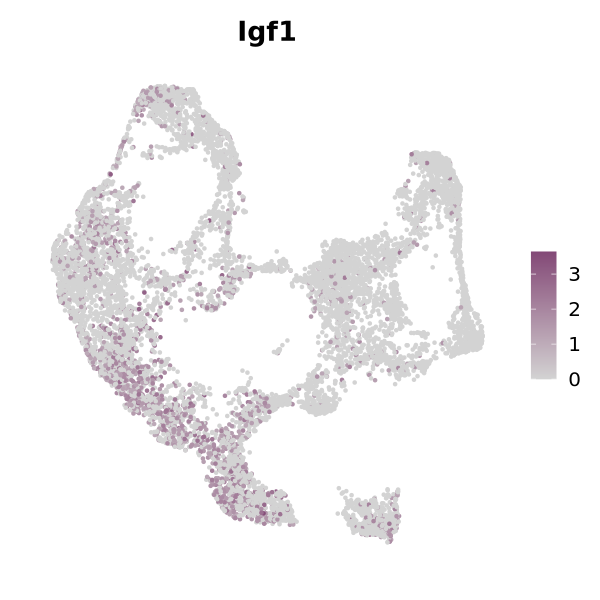

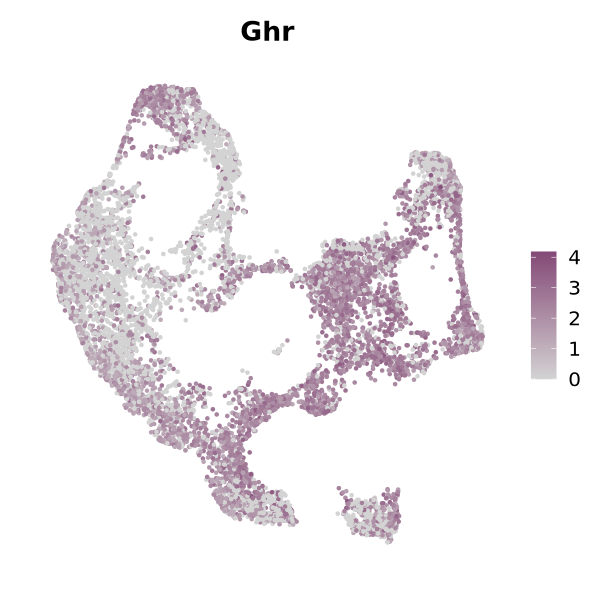

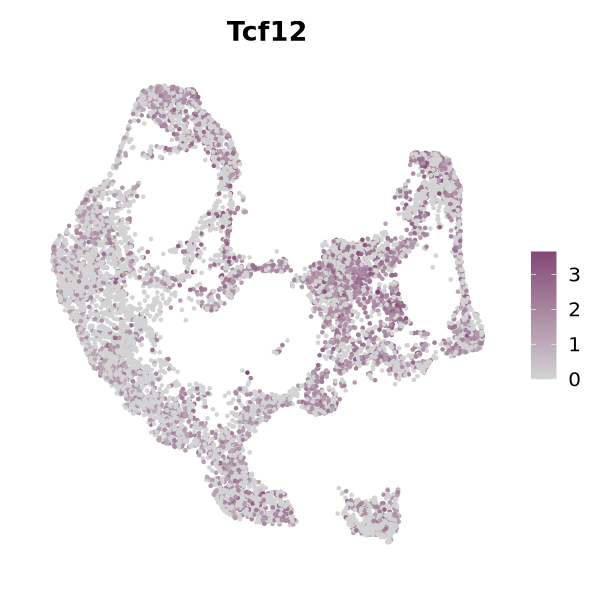

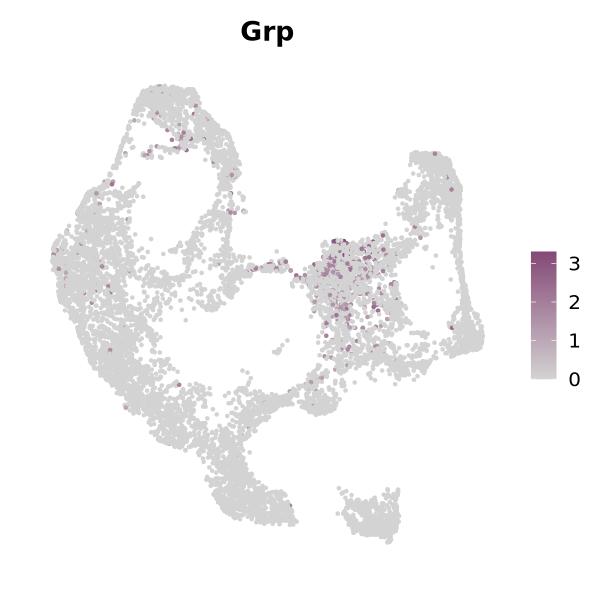

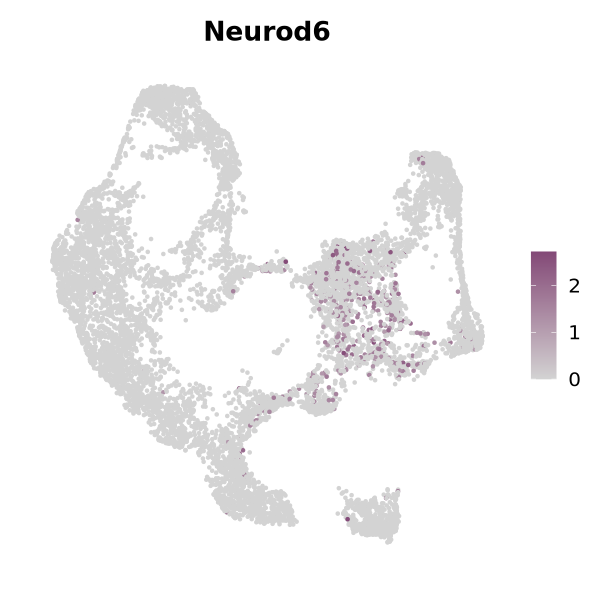

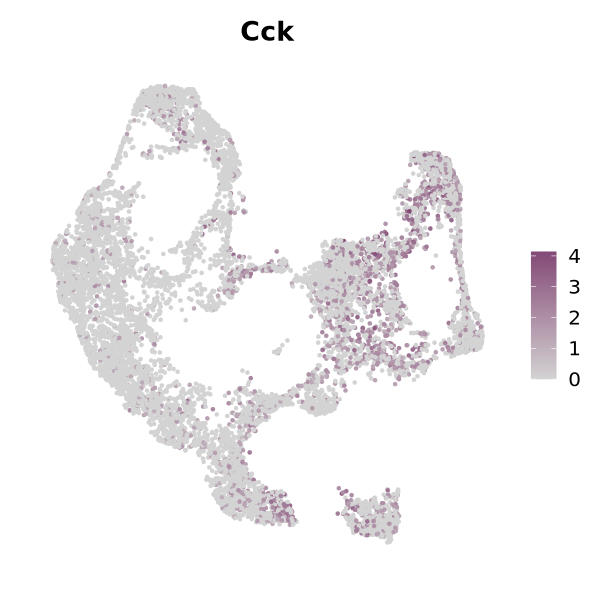

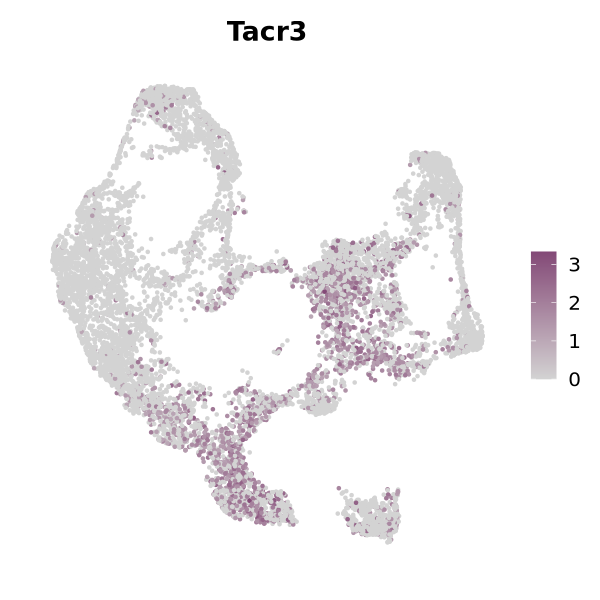

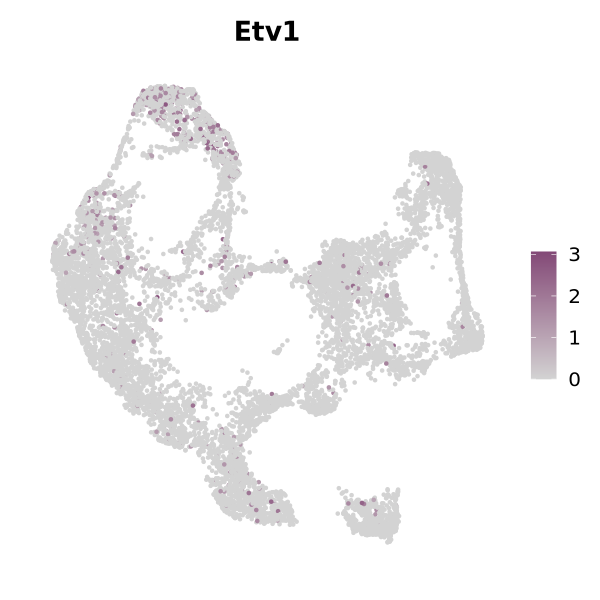

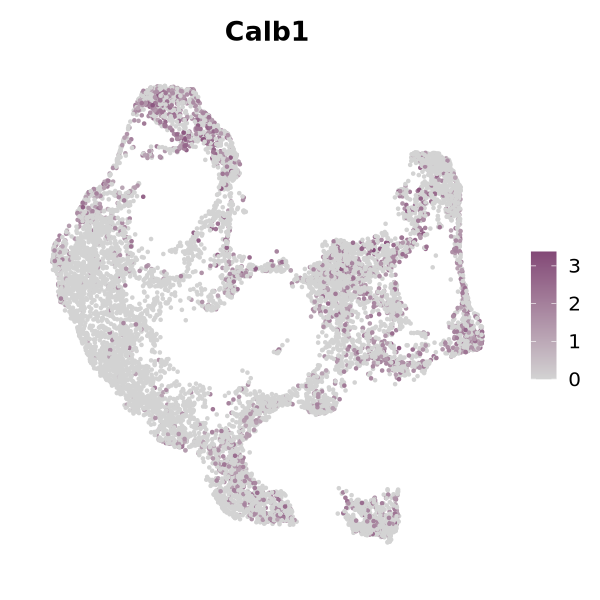

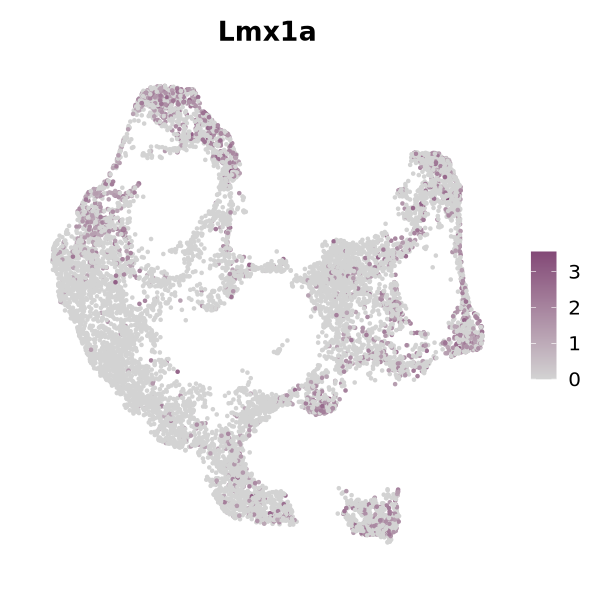

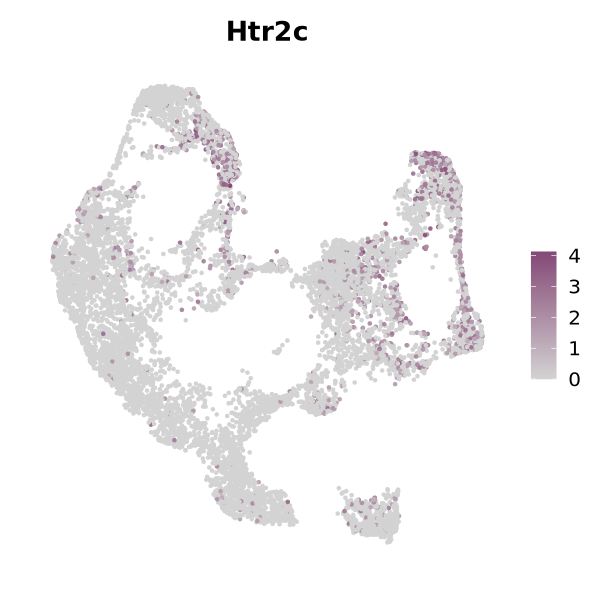

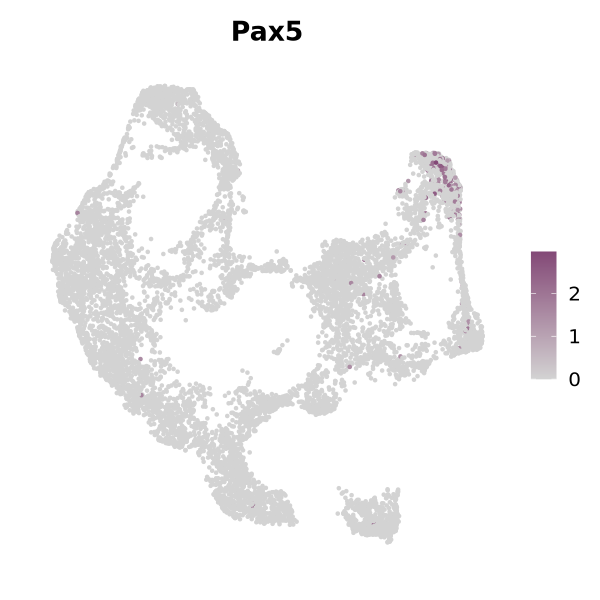

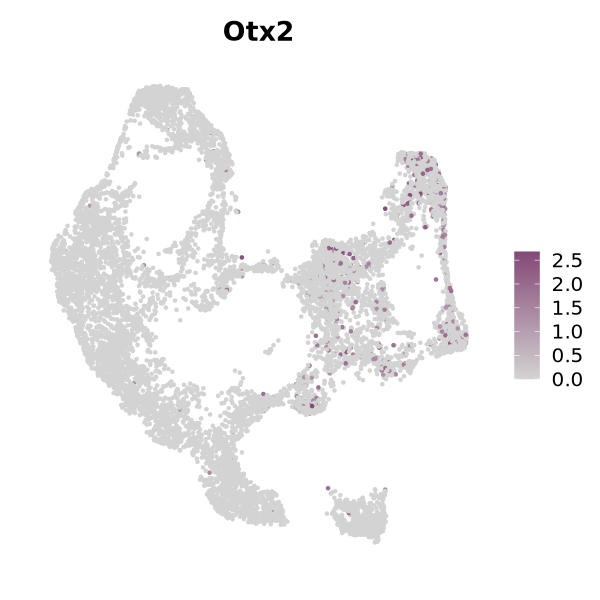

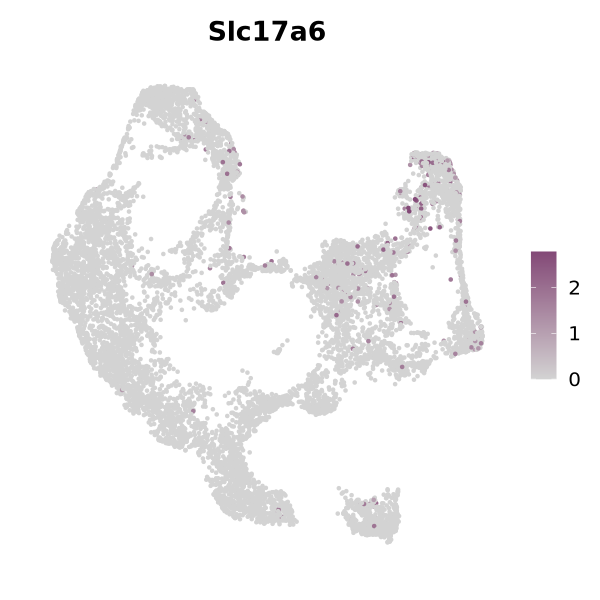

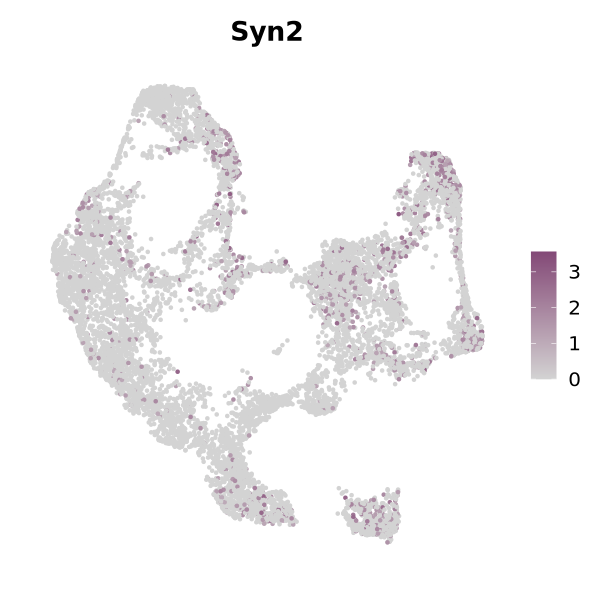

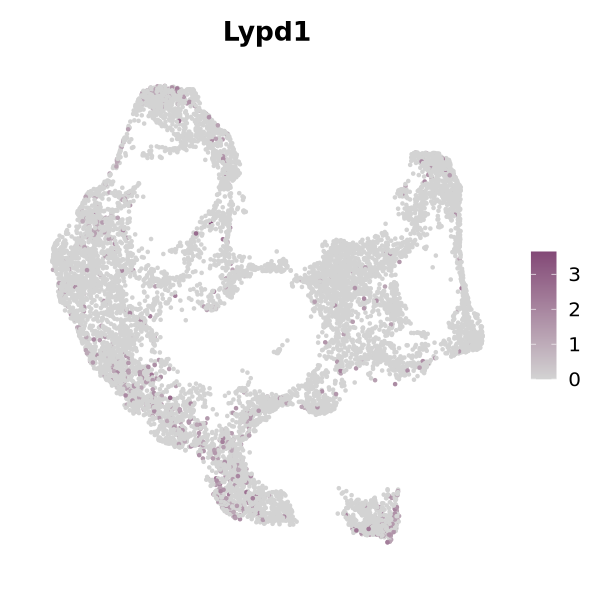

In [41]:
# Figure S9C-H
for (gene in da_marker_list){
    options(repr.plot.width = 5, repr.plot.height = 5) 
    p <- FeaturePlot(da, features=gene, pt.size=0.5, order=FALSE, cols=c("lightgray","#834977")) + NoAxes()
    plot(p)
    ggsave(paste0('./plots/final_figures/da_subclusters_',gene,'_featureplot.pdf'), width=5, height=5, dpi=320)
}

In [ ]:
# Figure S9I